## Data Analysis with SAS

### Importing data

In [1]:
PROC PRINT data = sashelp.CARS (obs= 5);
Run;

SAS Connection established. Subprocess id is 4105



In [5]:
* Import data from sashelp;
DATA CARS;
SET SASHELP.CARS;
RUN;

PROC PRINT data = CARS (obs= 5);
Run;

#### Getting information about data

In [6]:
PROC CONTENTS DATA = CARS;
RUN;

In [12]:
*Another way of getting details;
PROC CONTENTS data = CARS  OUT = CARS_DETAILS;
Run;

#### Variable exploration with proc means

In [9]:
PROC MEANS data = CARS;
VAR Length;
Run;

In [14]:
PROC MEANS data = CARS max min mean n;
VAR Length;
Run;

In [15]:
PROC MEANS data = CARS std mean;
VAR Length;
Run;

In [13]:
PROC MEANS data = CARS;
VAR Length Weight Invoice EngineSize;
Run;

In [16]:
* getting missing values;
PROC MEANS data = CARS nmiss;
VAR Length Weight Invoice EngineSize;
Run;

In [17]:
* getting missing values;
PROC MEANS data = CARS nmiss;
Run;

#### Variable exploration with proc freq

In [18]:
PROC FREQ data = CARS;
table make;
Run;

In [19]:
PROC FREQ data = CARS;
table origin*type;
Run;

In [20]:
PROC FREQ data = CARS;
table DriveTrain;
Run;

#### Plotting variables


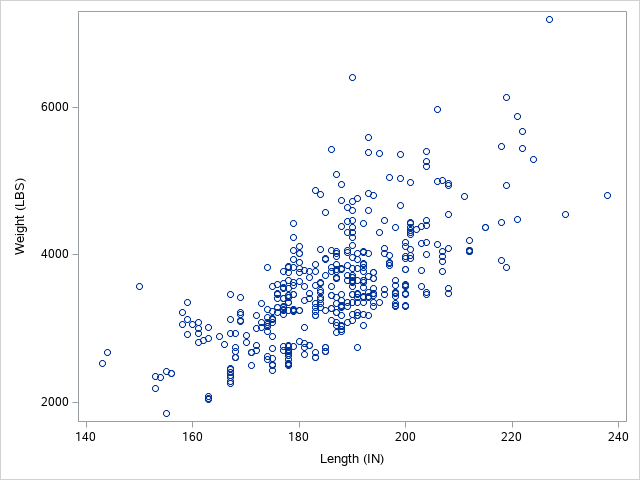

In [27]:
PROC sgplot data = CARS;
scatter x = Length y = Weight;
Run;


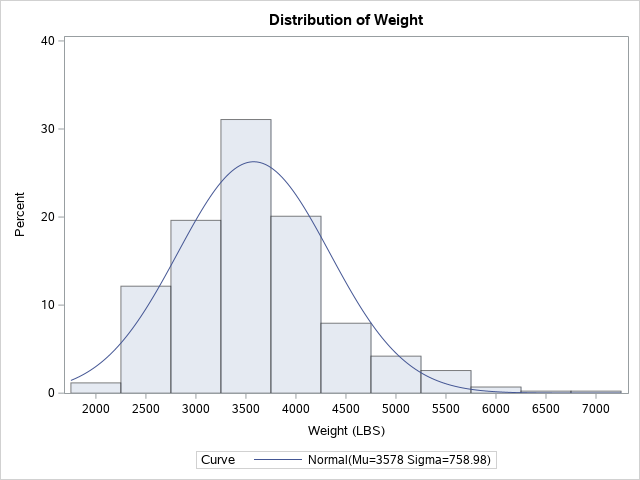

In [29]:
TITLE 'Summary of Weight Variable';
PROC UNIVARIATE DATA = CARS NOPRINT;
HISTOGRAM weight / NORMAL; 
RUN;


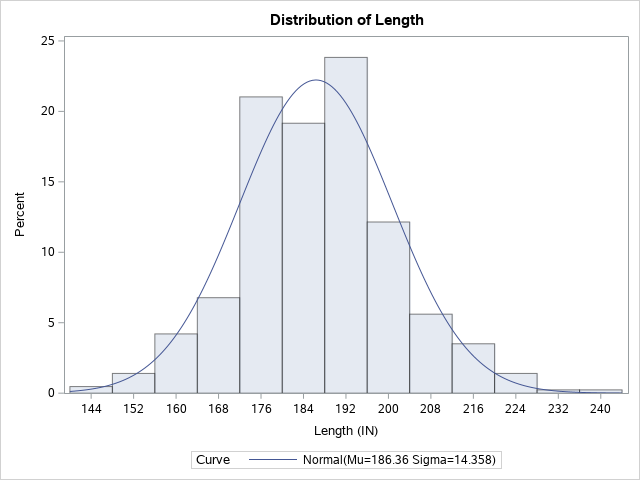

In [31]:
TITLE 'Summary of Length Variable';
PROC UNIVARIATE DATA = CARS NOPRINT;
HISTOGRAM Length / NORMAL; 
RUN;

In [32]:
TITLE 'Summary of Weight Variable';
PROC UNIVARIATE DATA = CARS;
Var weight; 
RUN;
quit;

In [33]:
TITLE 'Summary of Length Variable';
PROC UNIVARIATE DATA = CARS;
Var Length; 
RUN;
quit;

#### Linear regression


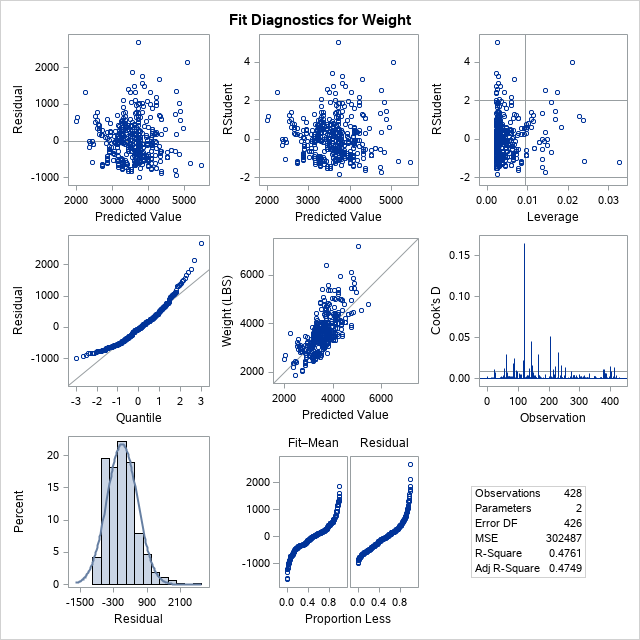
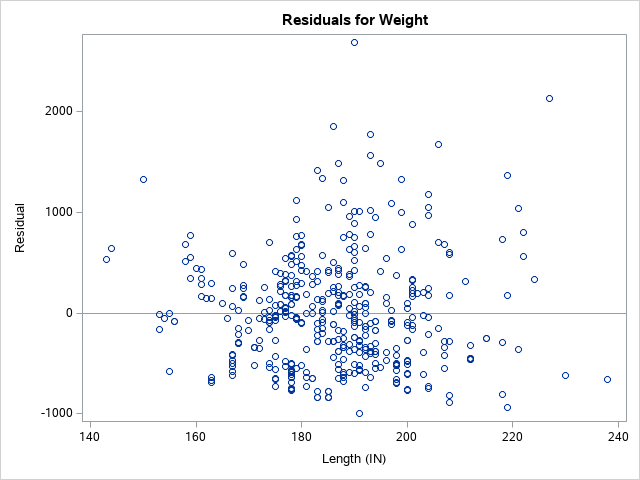
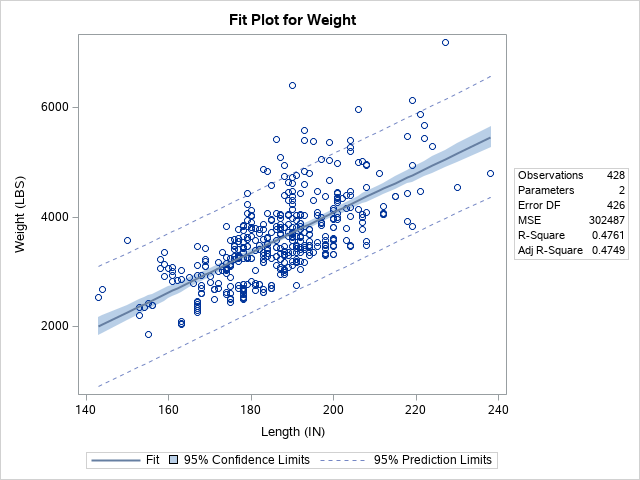

In [35]:
proc reg data=cars;
model weight= Length ;
run;


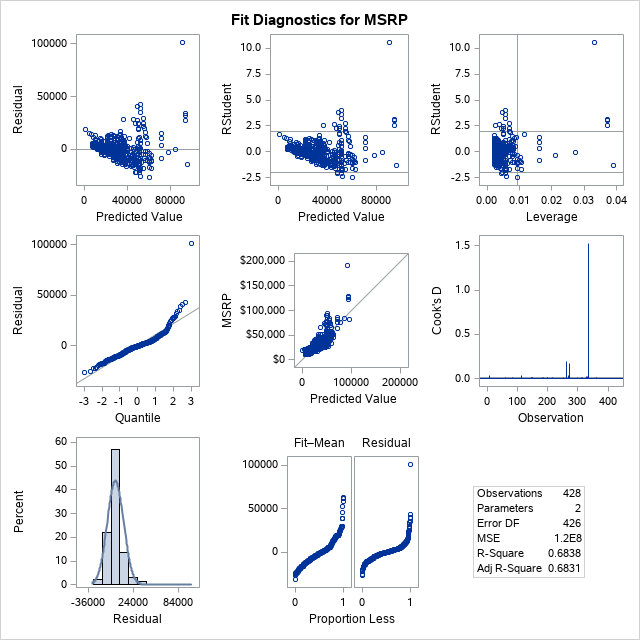
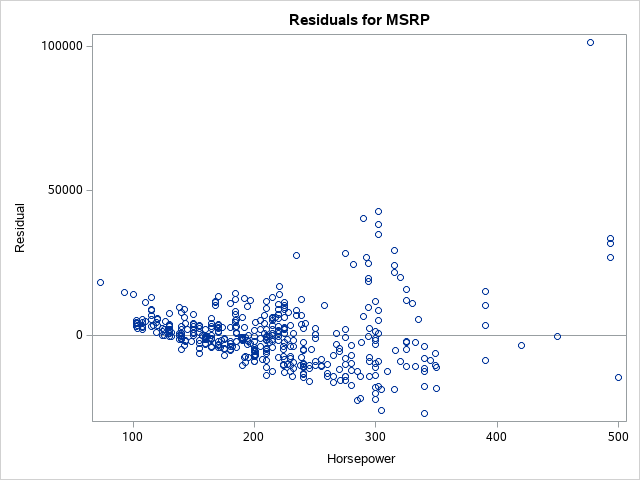
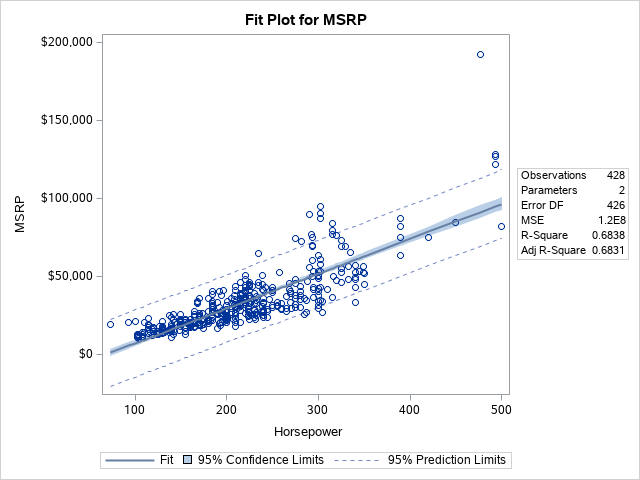

In [36]:
proc reg data=cars;
model MSRP = Horsepower ;
run;


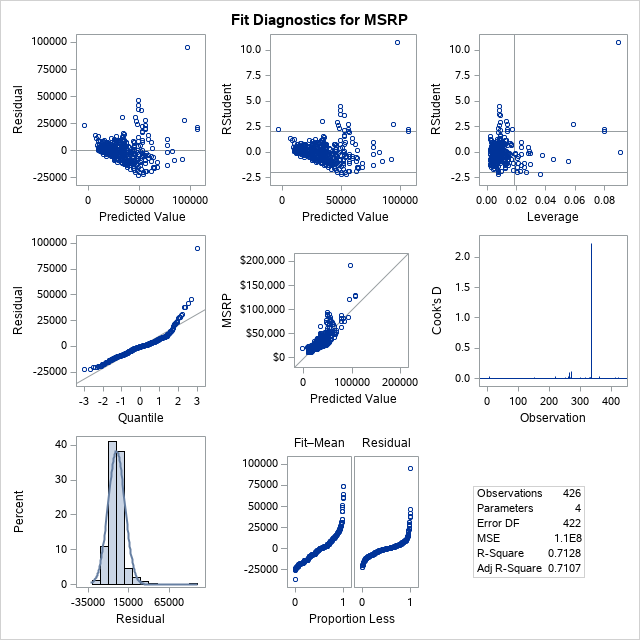
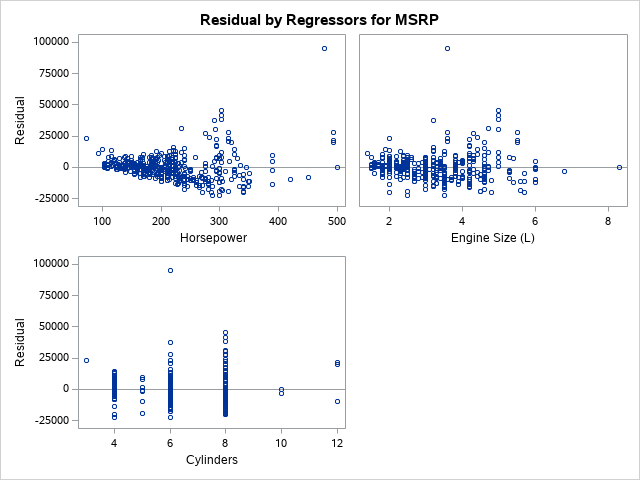

In [37]:
proc reg data=cars;
model MSRP = Horsepower EngineSize Cylinders;
run;
quit;


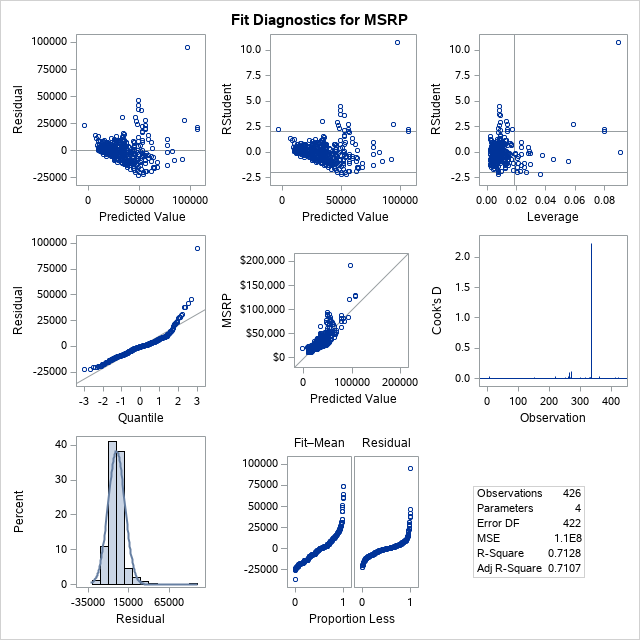
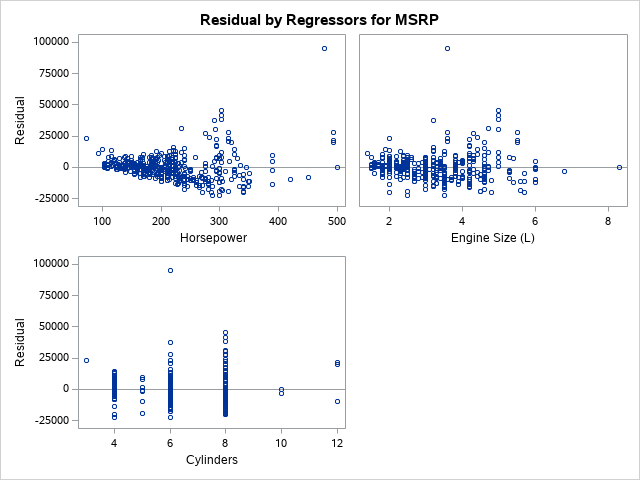

In [39]:
proc reg data=cars outest = modelstat;
model MSRP = Horsepower EngineSize Cylinders;
run;
quit;


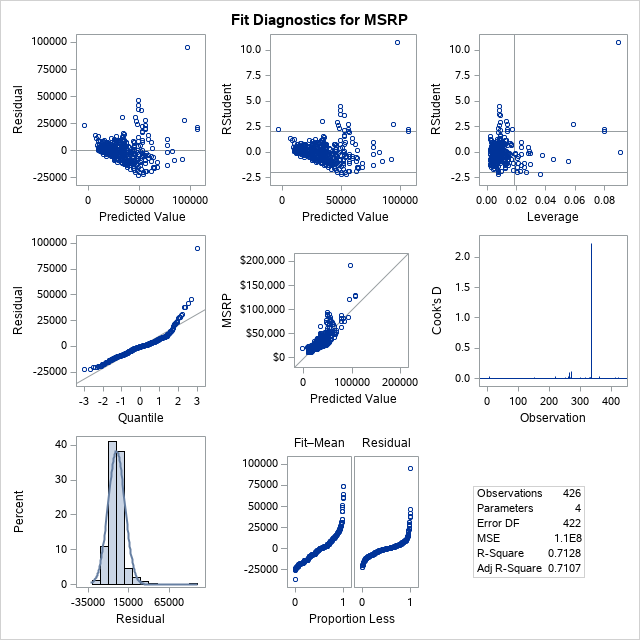
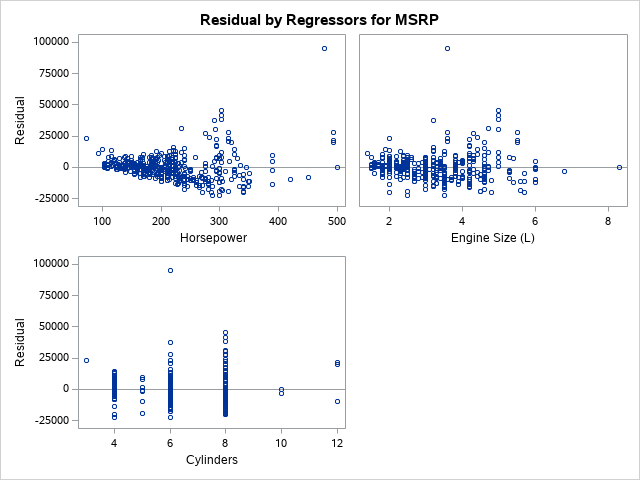
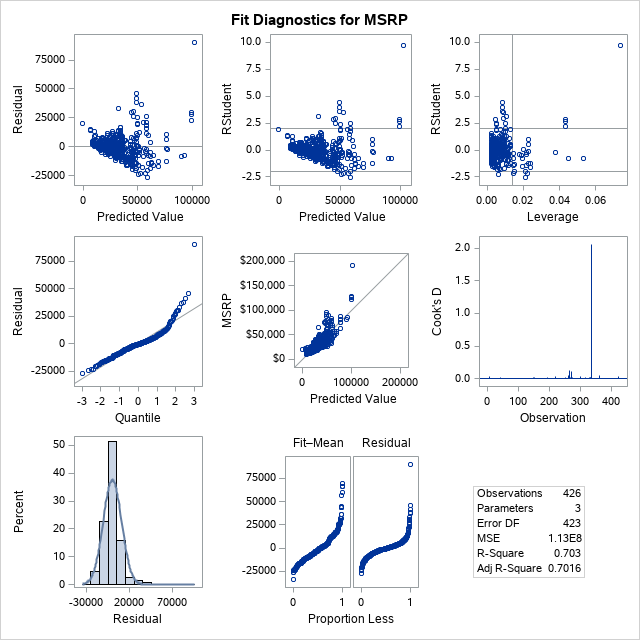
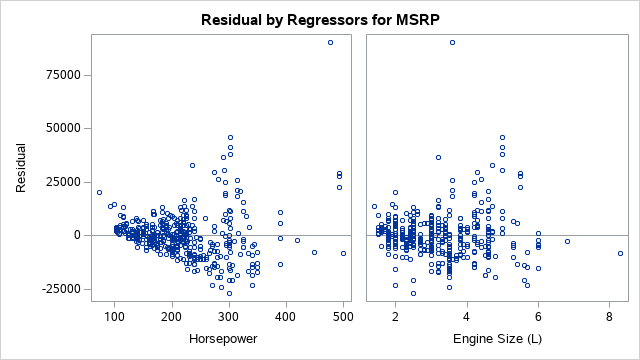
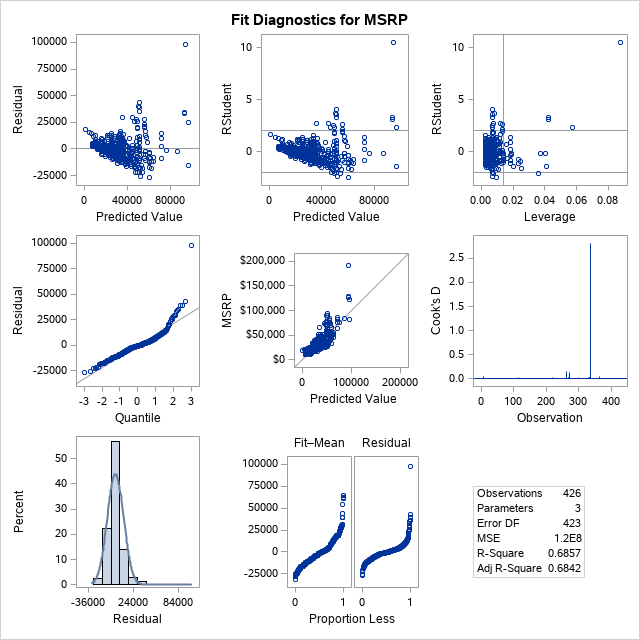
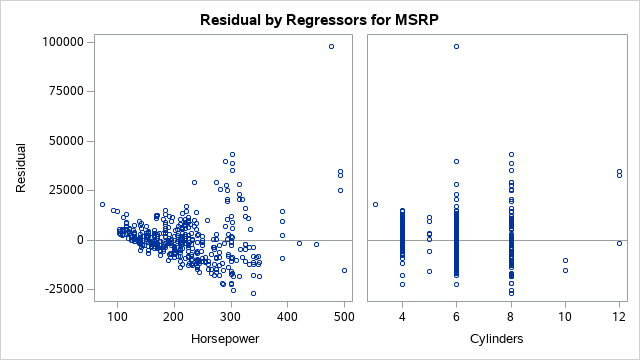
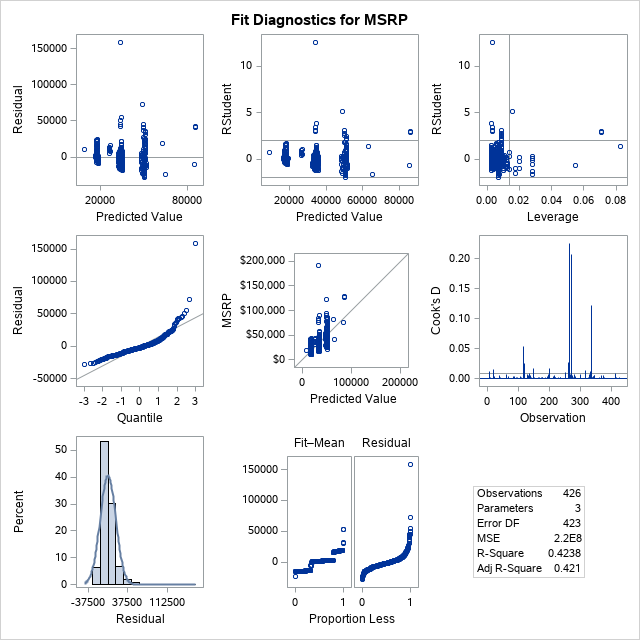
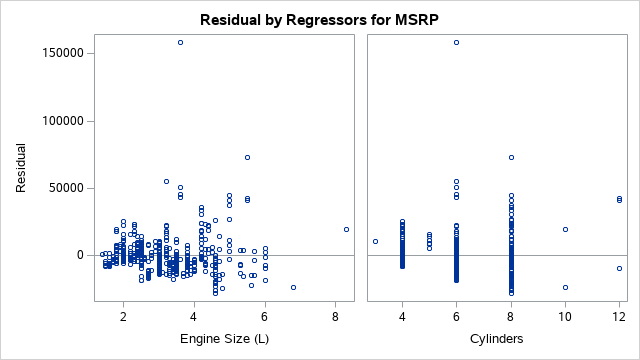

In [40]:
proc reg data=cars;
eq1: model MSRP = Horsepower EngineSize Cylinders;
eq2: model MSRP = Horsepower EngineSize;
eq3: model MSRP = Horsepower Cylinders;
eq4: model MSRP = EngineSize Cylinders;
run;
quit;

### Time Series Analysis ARIMA Model

In [41]:
PROC PRINT data = sashelp.air (obs= 5);
Run;

In [43]:
* Import data from sashelp;
DATA air;
SET SASHELP.air;
RUN;

PROC PRINT data = air (obs= 5);
Run;

In [44]:
PROC CONTENTS DATA = air;
RUN;

In [45]:
PROC MEANS data = air;
Run;

In [46]:
* getting missing values;
PROC MEANS data = air nmiss;
Run;


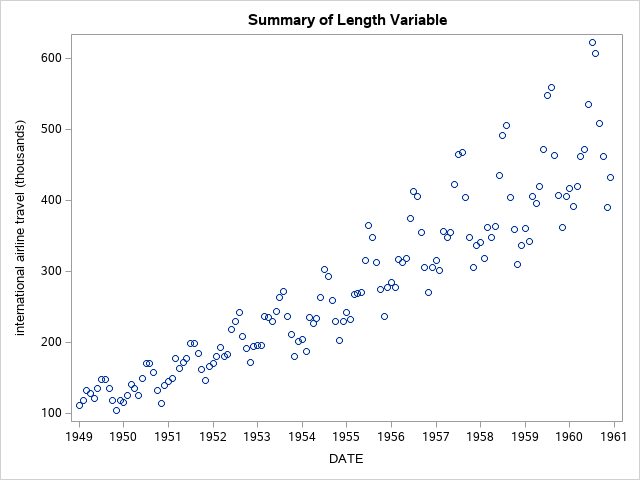

In [47]:
PROC sgplot data = air;
scatter x = date y = air;
Run;


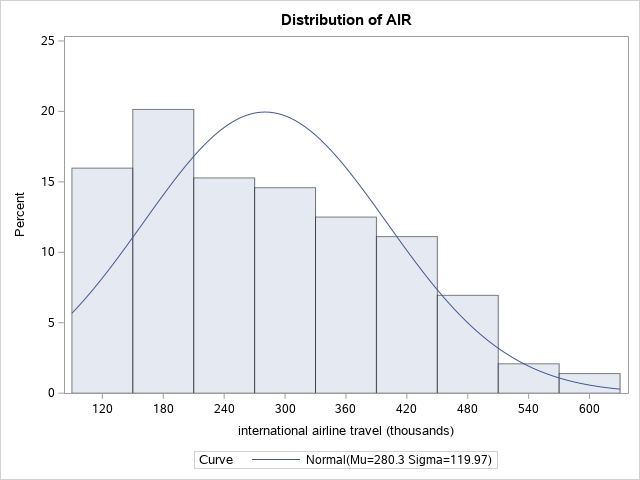

In [48]:
TITLE 'Summary of AIR Variable';
PROC UNIVARIATE DATA = air NOPRINT;
HISTOGRAM air / NORMAL; 
RUN;


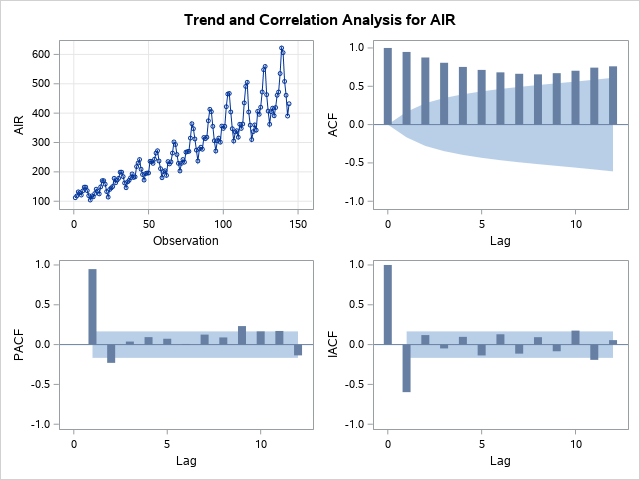

In [50]:
PROC arima data = air;
identify var = air nlag = 12;
Run;
quit;


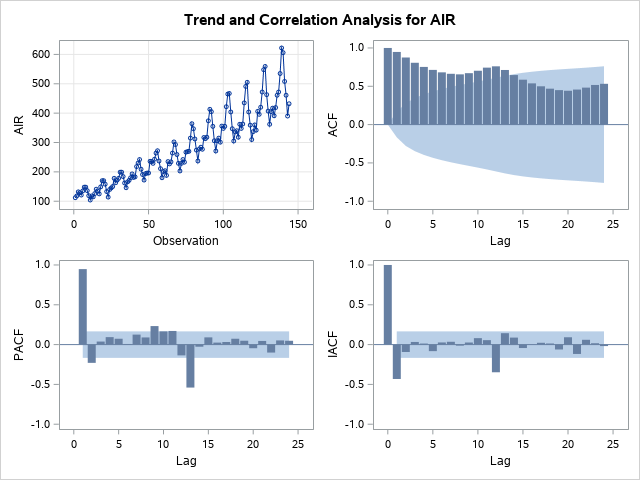

In [51]:
PROC arima data = air;
identify var = air nlag = 24;
Run;
quit;


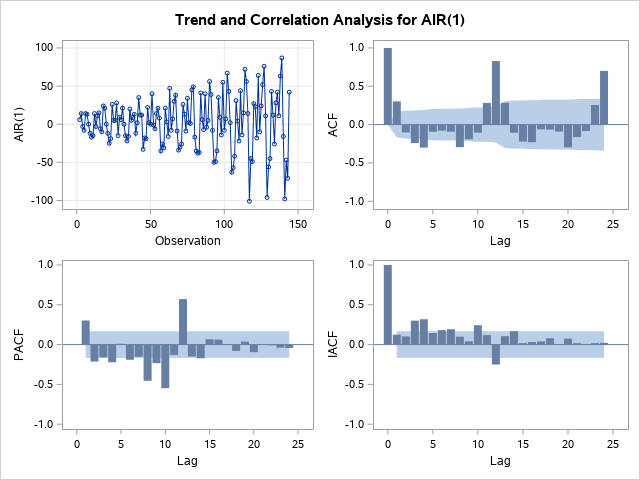

In [53]:
TITLE 'First Order Differencing';
PROC arima data = air;
identify var = air(1);
Run;
quit;


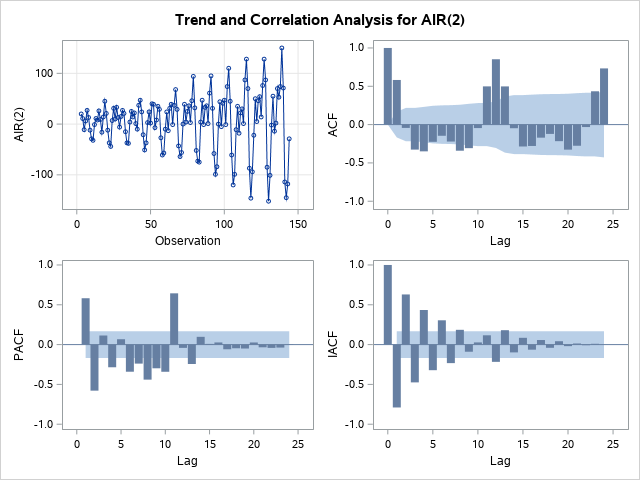

In [54]:
TITLE 'Second Order Differencing';
PROC arima data = air;
identify var = air(2);
Run;
quit;


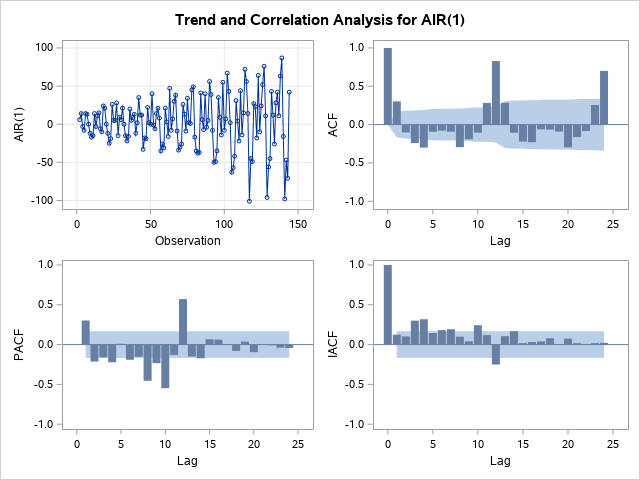
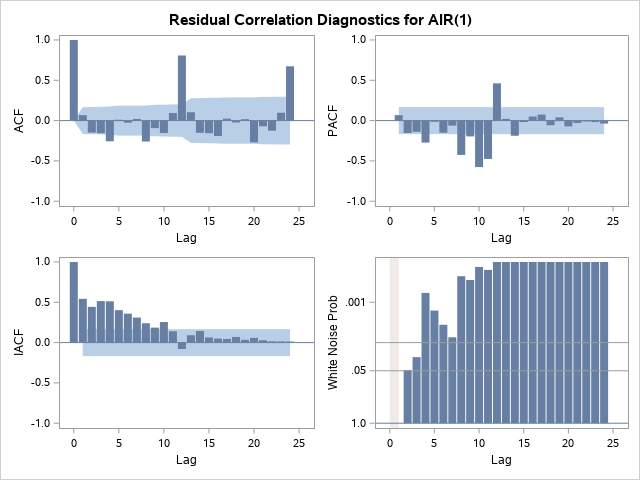
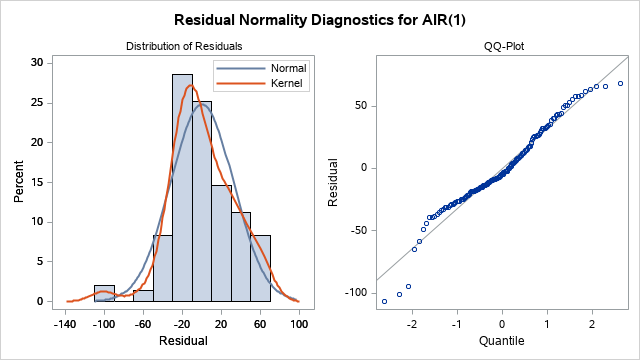

In [55]:
TITLE 'Estimation and Diagnostic Check';
PROC arima data = air;
identify var = air(1);
estimate p=1;
Run;
quit;


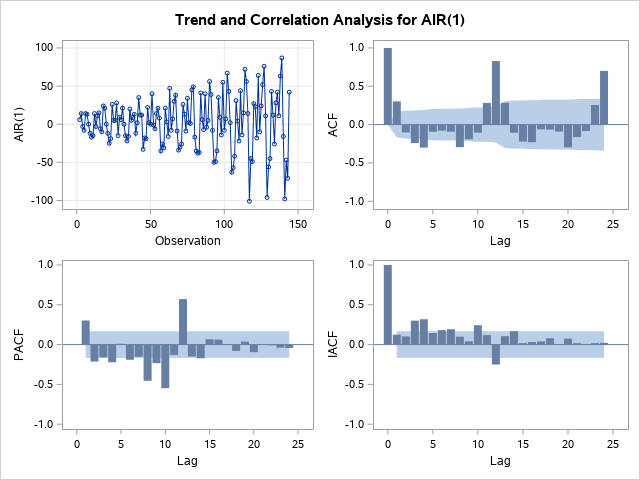
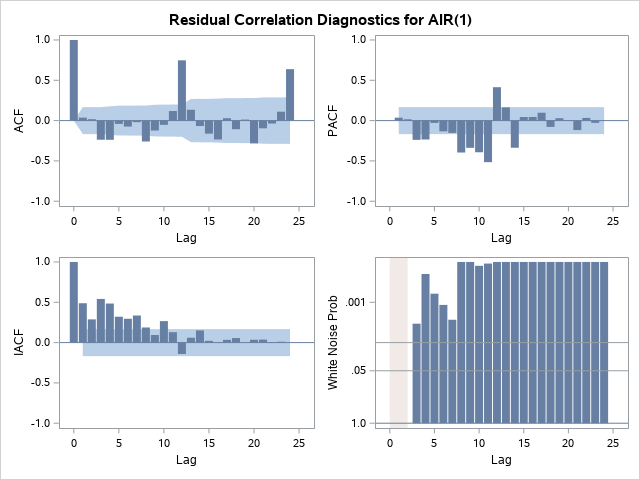
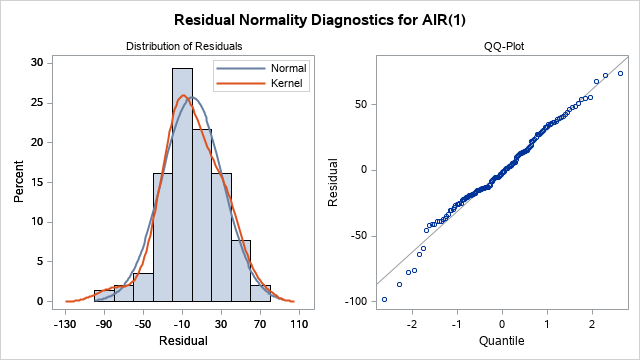

In [57]:
TITLE 'Estimation and Diagnostic Check';
PROC arima data = air;
identify var = air(1);
estimate p=1 q=1;
Run;
quit;
*This is arima(1,1,1) model;


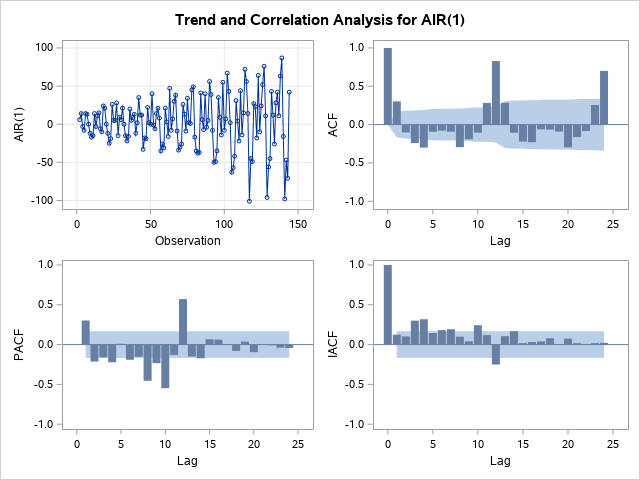
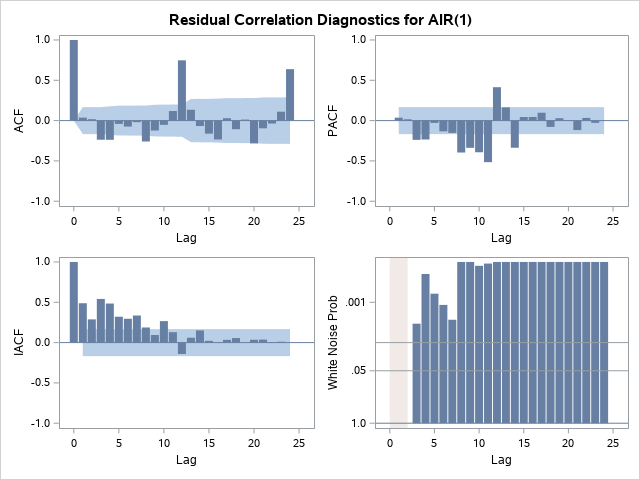
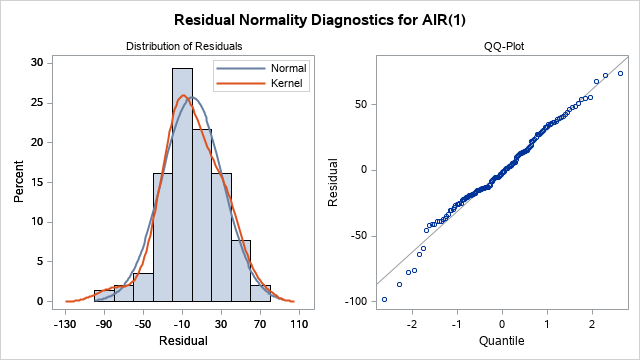
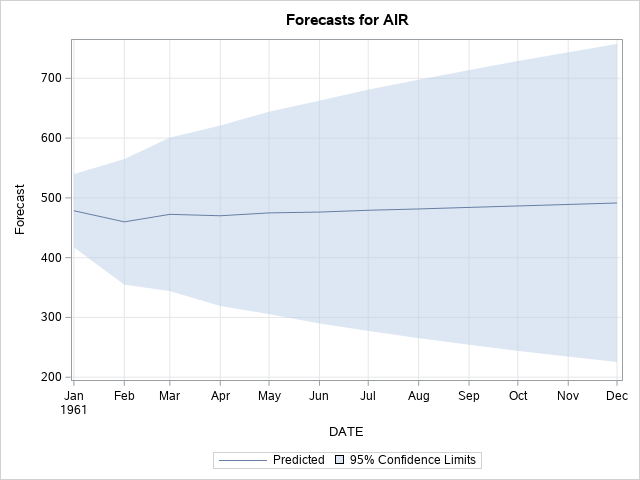

In [58]:
TITLE 'Forecasting';
PROC arima data = air;
identify var = air(1);
estimate p=1 q=1;
forecast lead = 12 interval= month id=date out=results;
Run;
quit;

### Model Selection

In [11]:
proc print data = sashelp.class(obs=5);
run:

In [13]:
* Import data from sashelp;
DATA Class;
SET SASHELP.class;
RUN;

PROC PRINT data = Class(obs= 5);
Run;

In [15]:
PROC univariate data = Class;
Run;


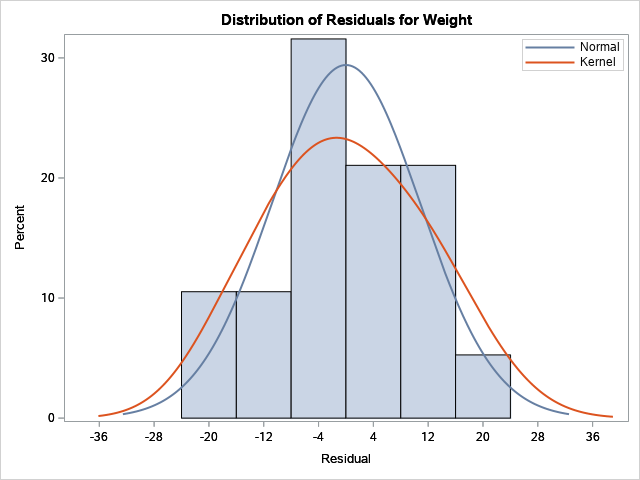
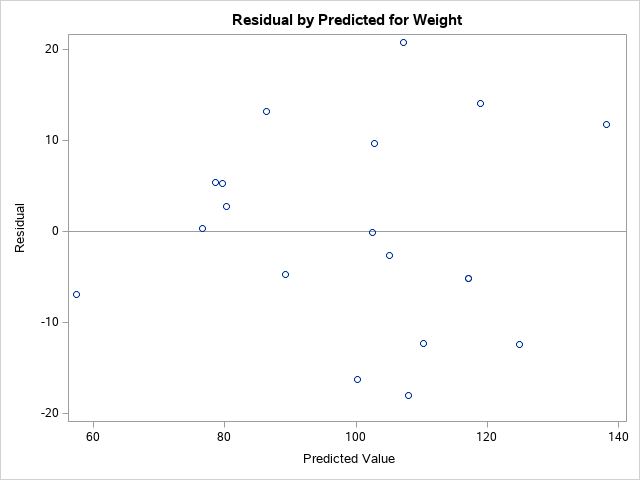
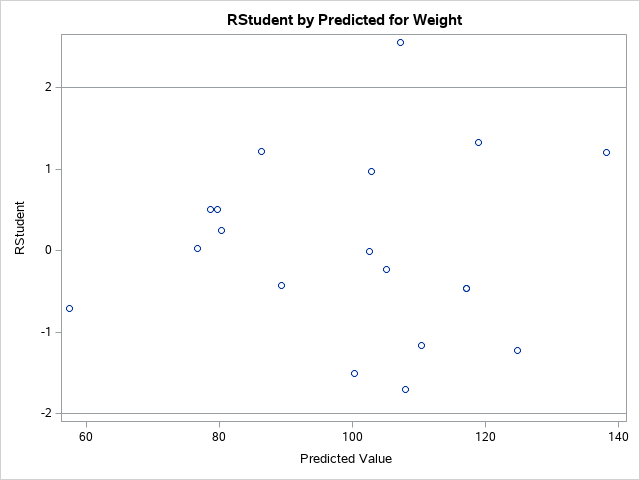
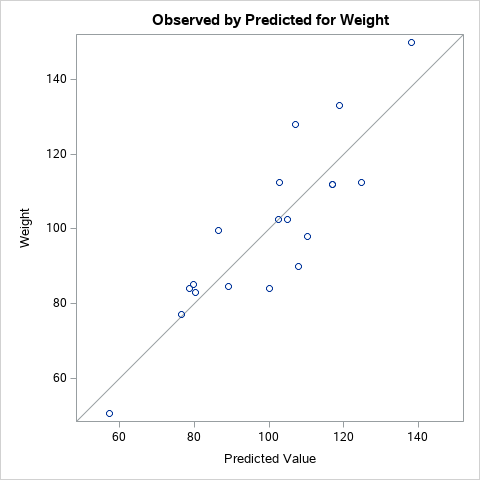
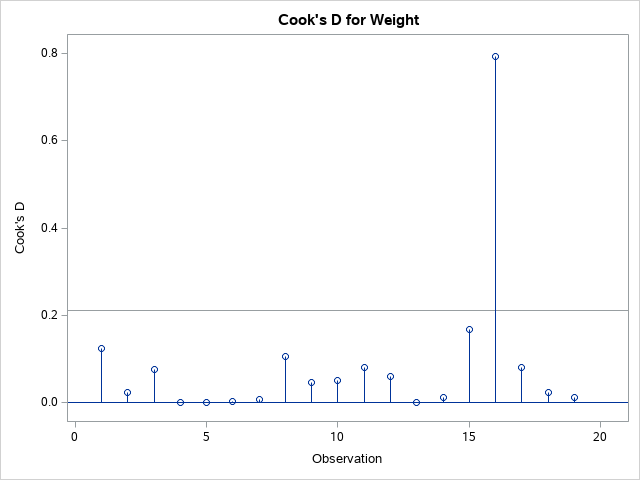
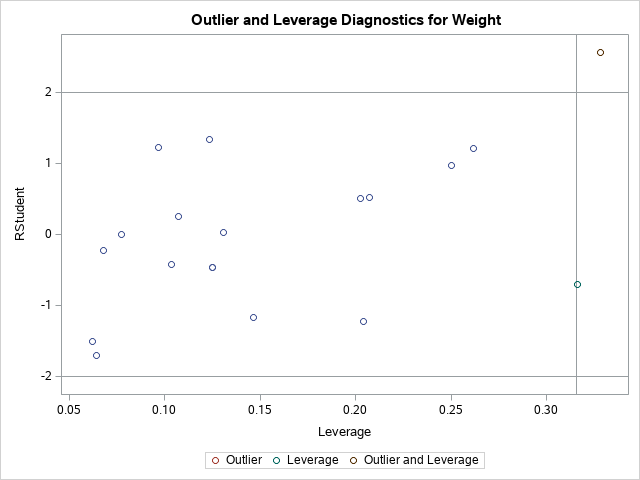
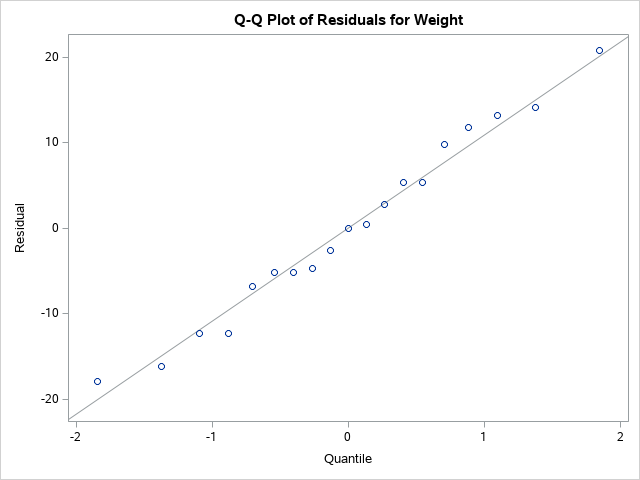
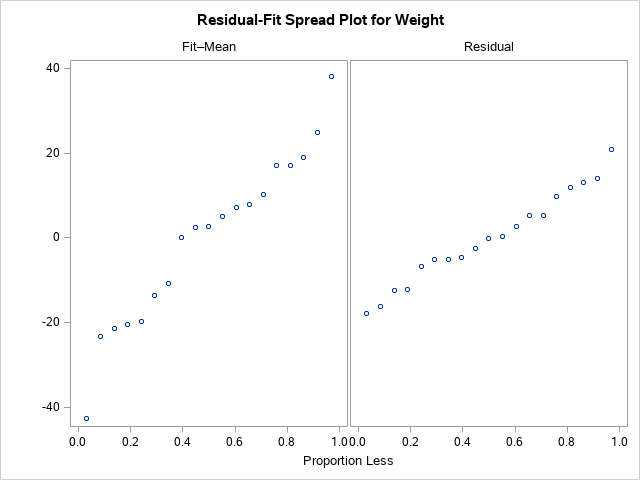
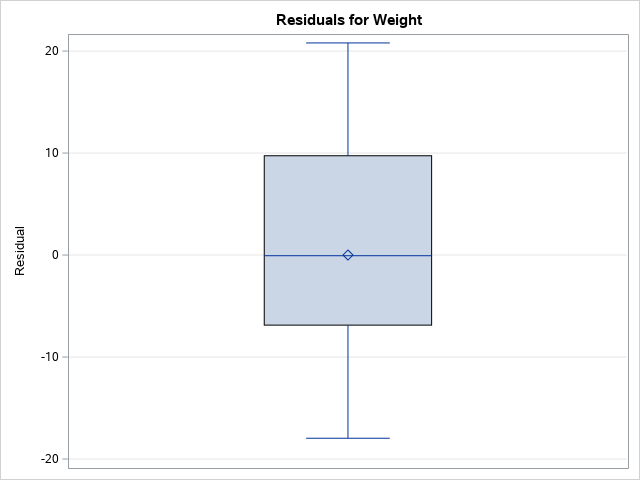
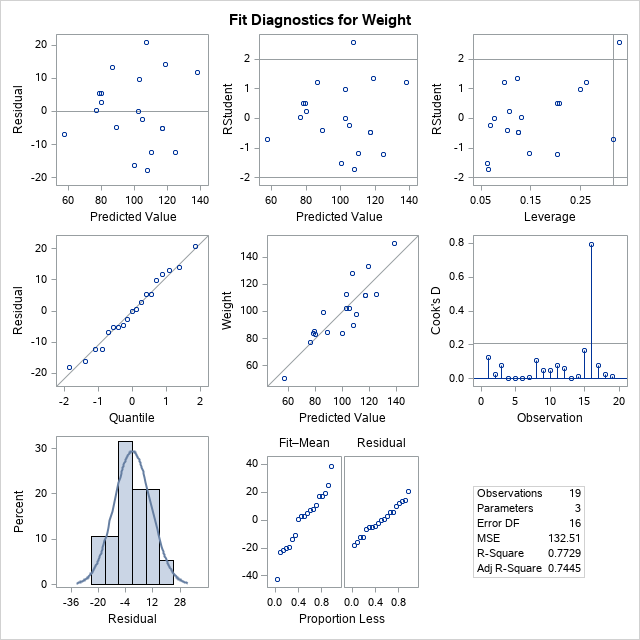
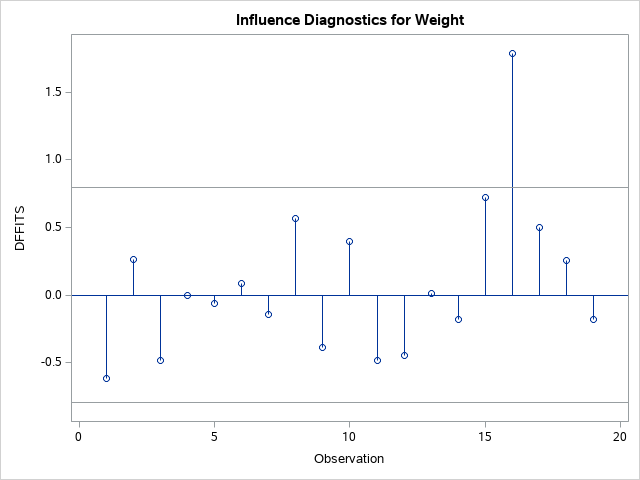
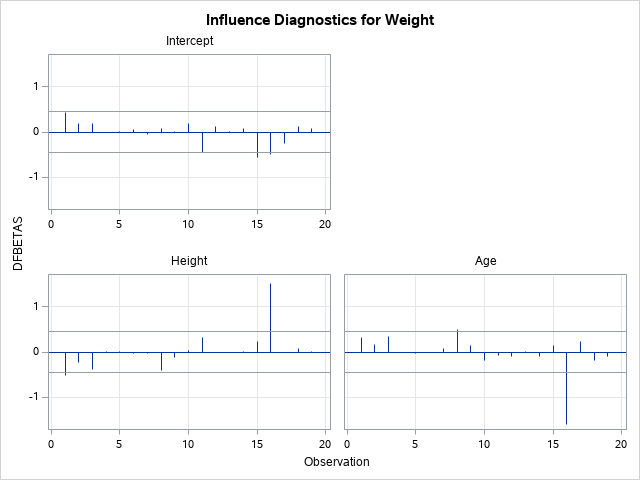
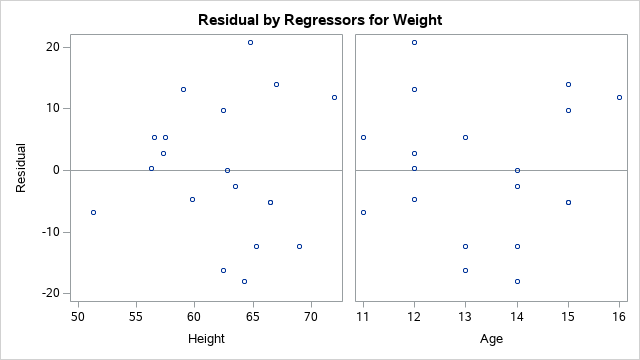

In [20]:
PROC reg data = Class plots = all;
model weight = height age;
Run;
quit;


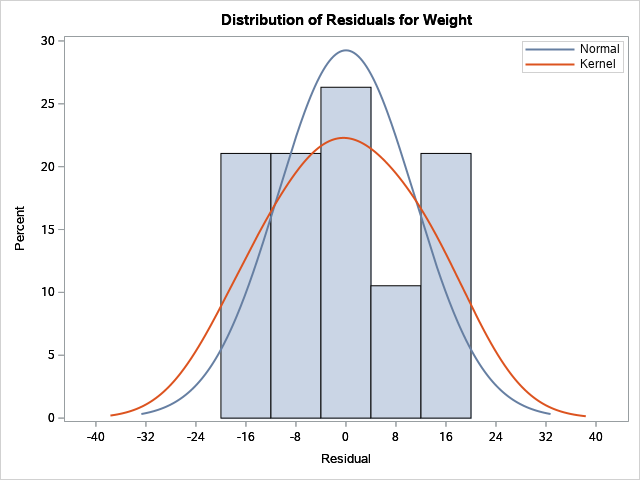
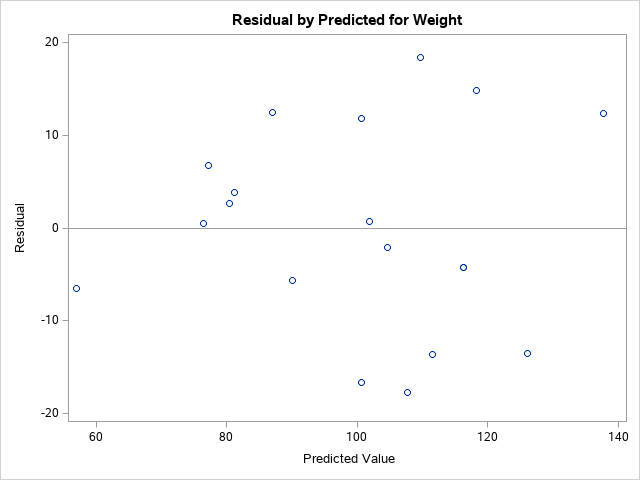
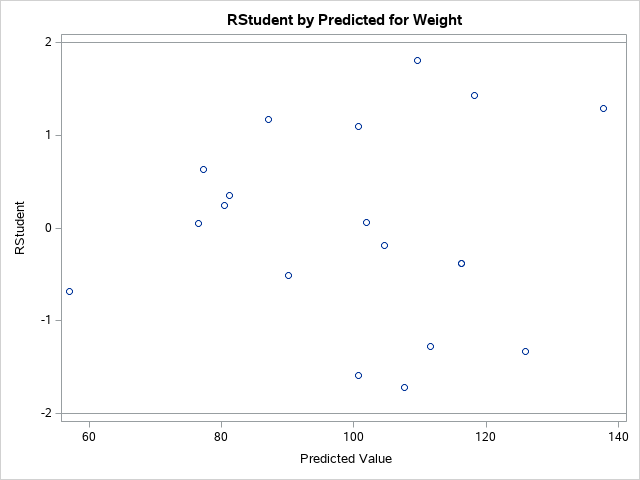
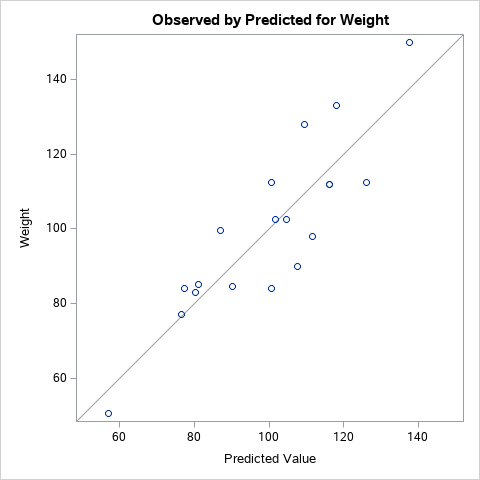
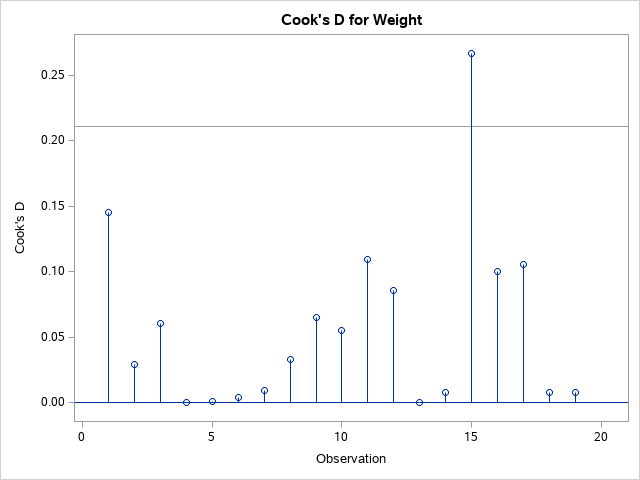
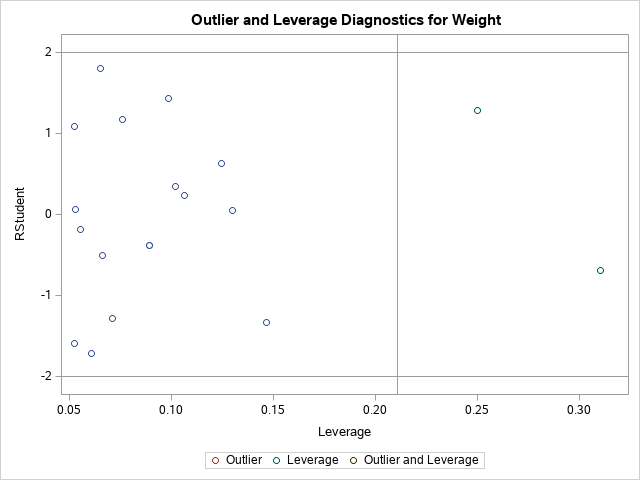
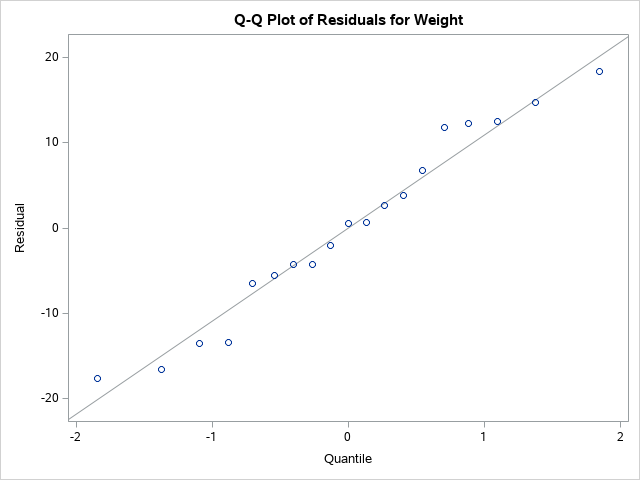
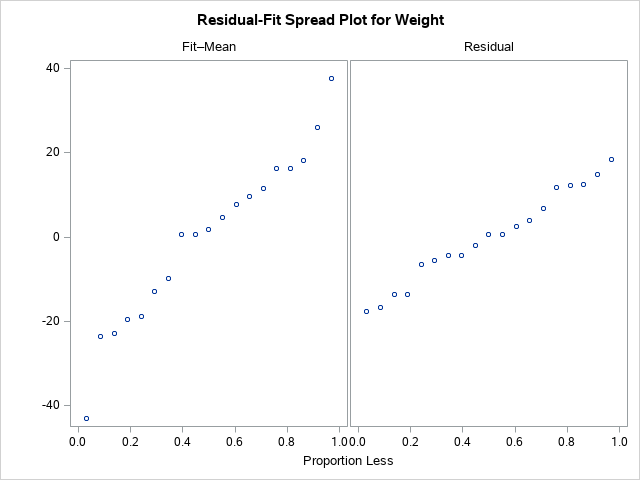
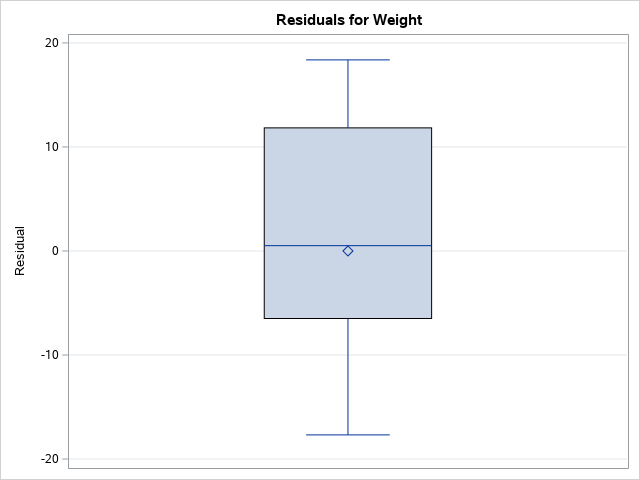
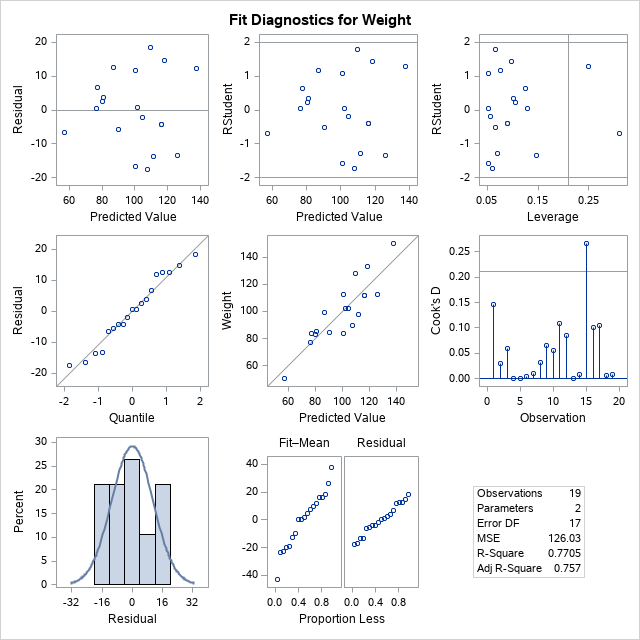
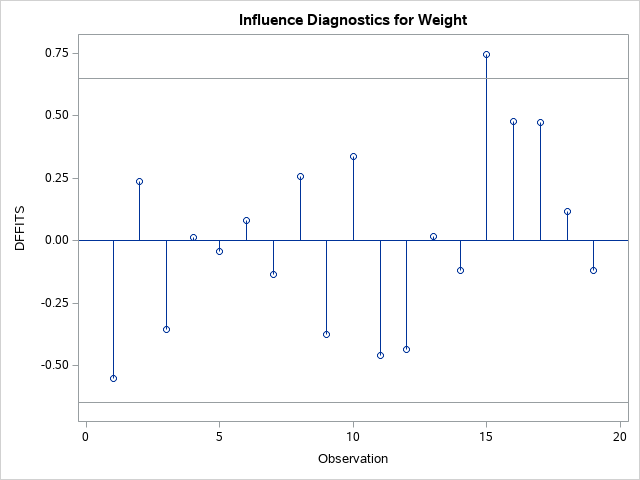
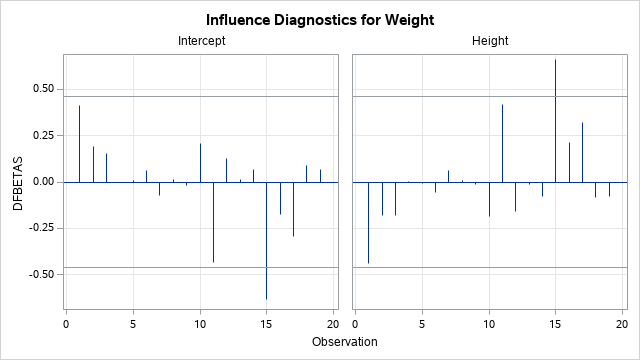
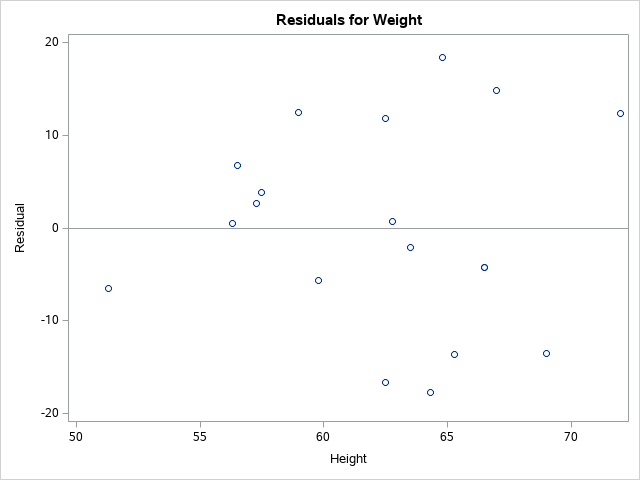
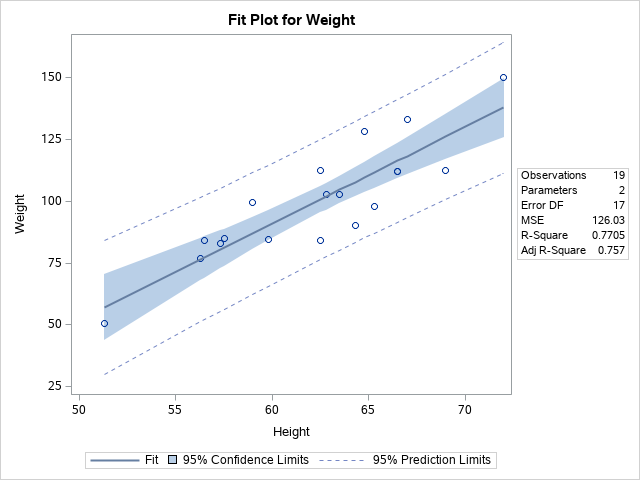

In [21]:
PROC reg data = Class plots = all;
model weight = height;
Run;
quit;


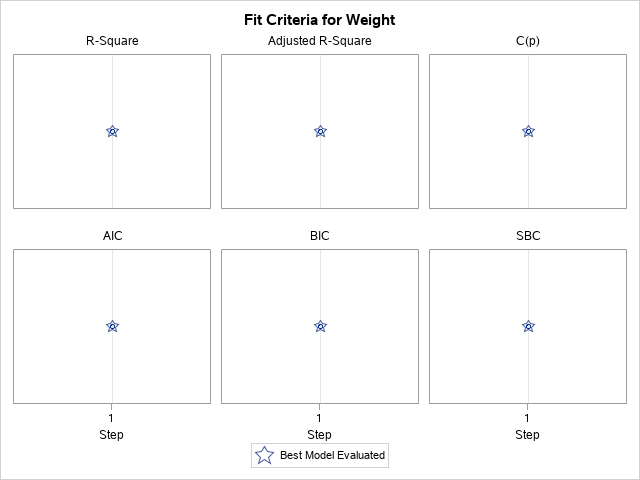
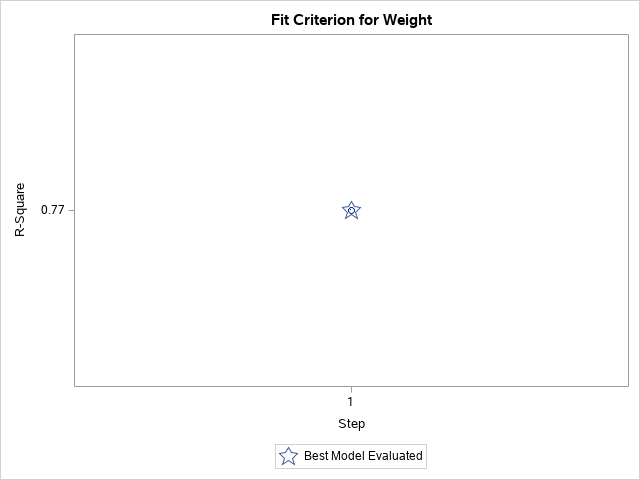
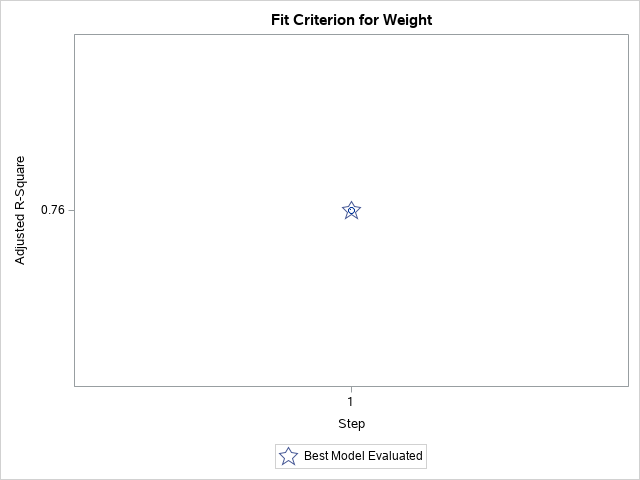
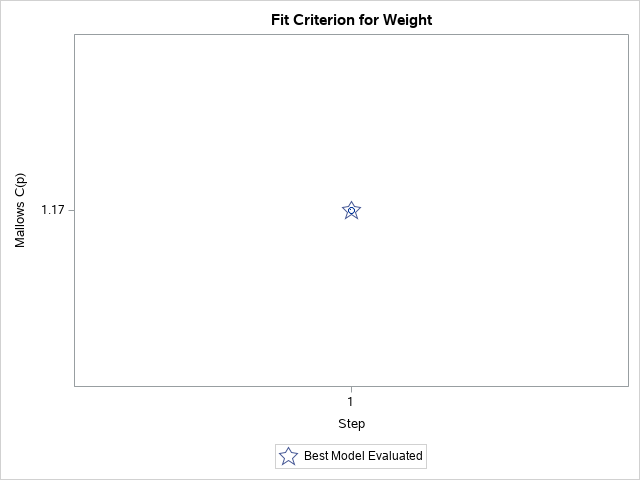
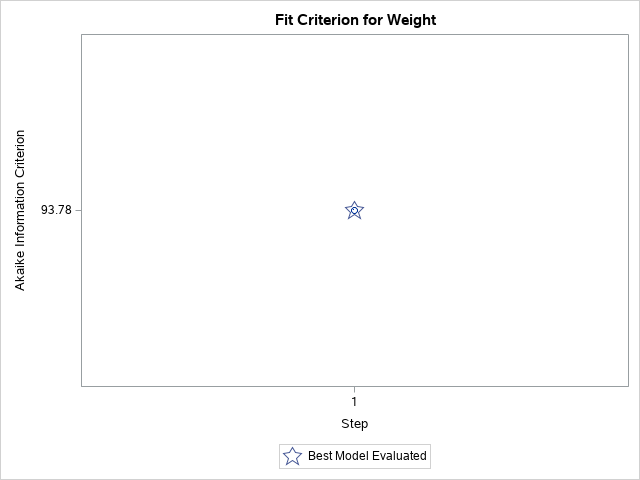
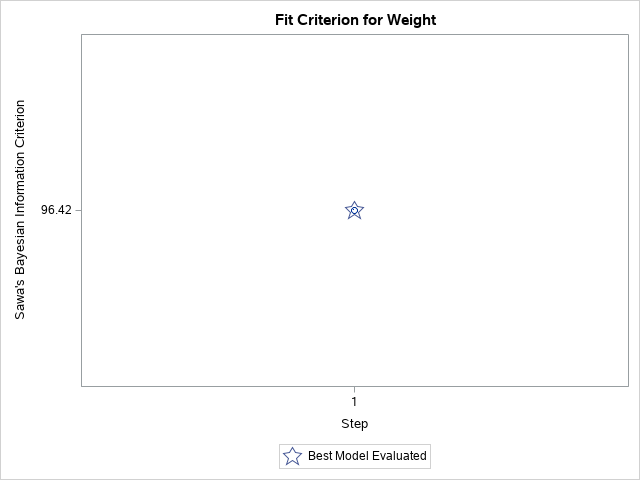
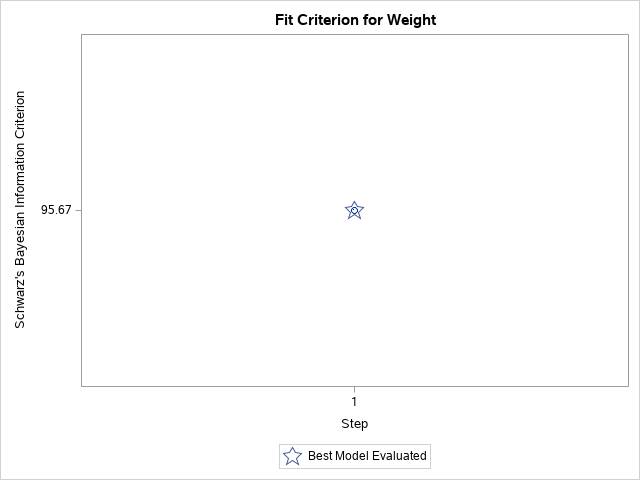
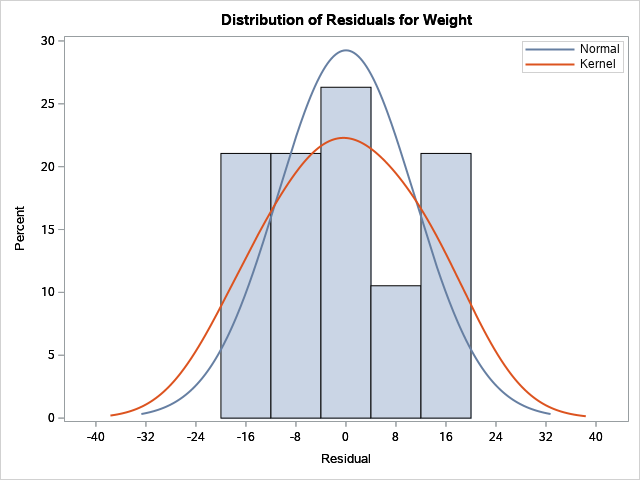
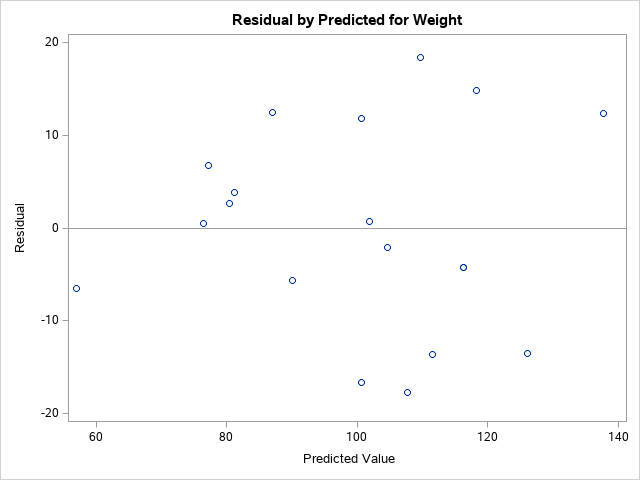
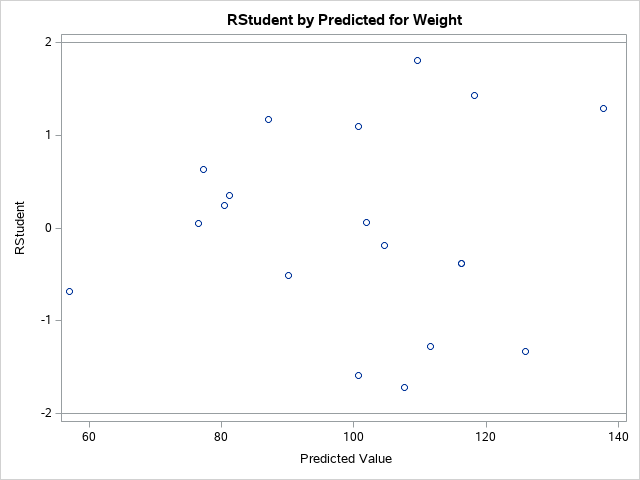
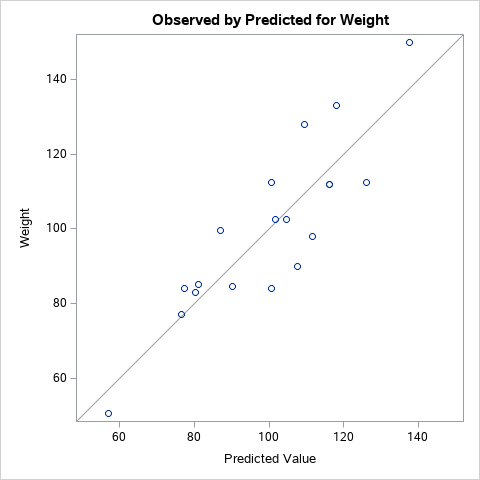
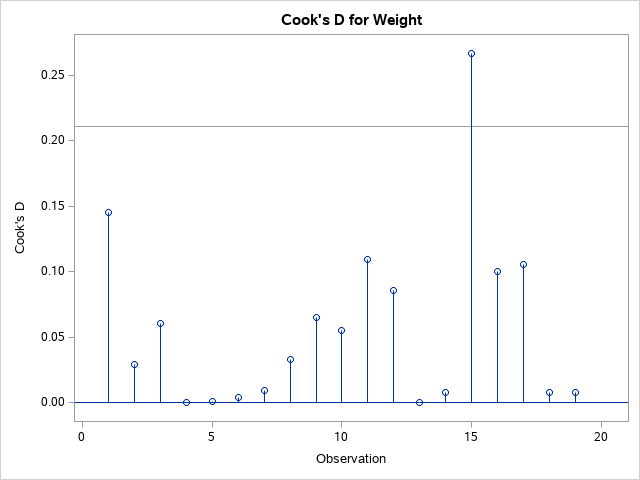
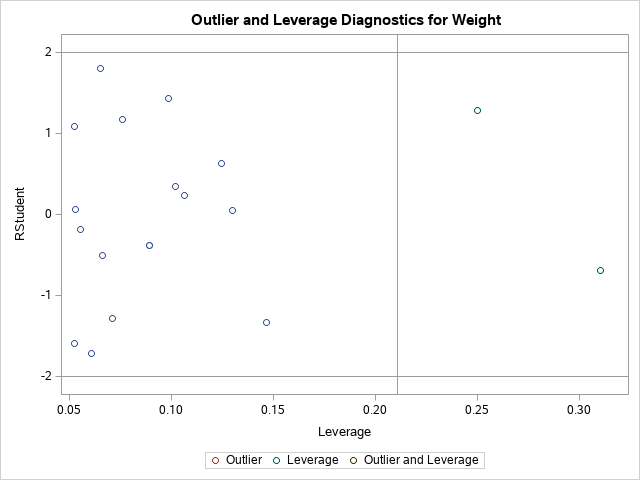
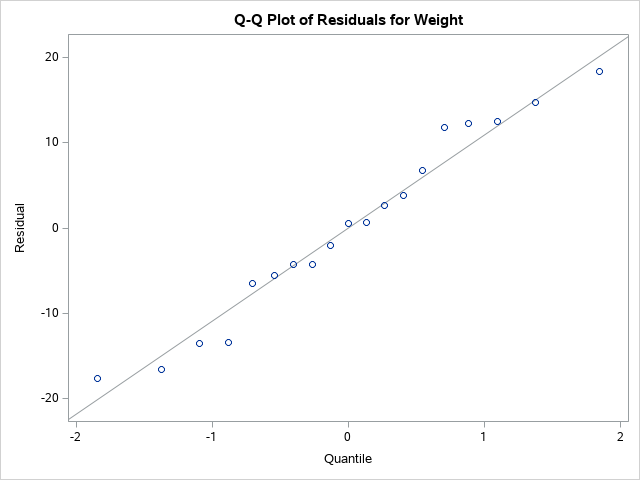
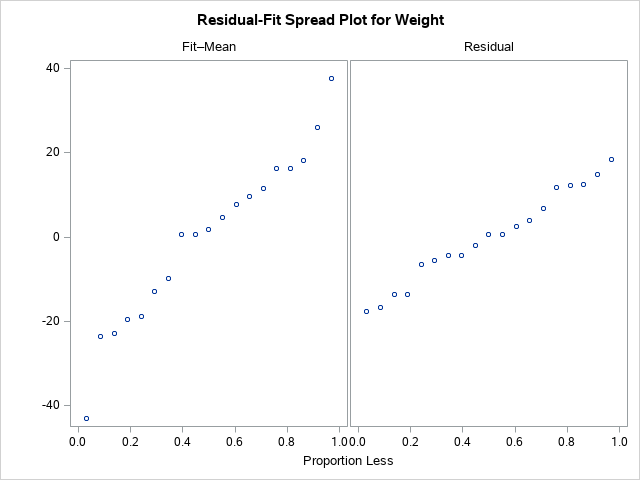
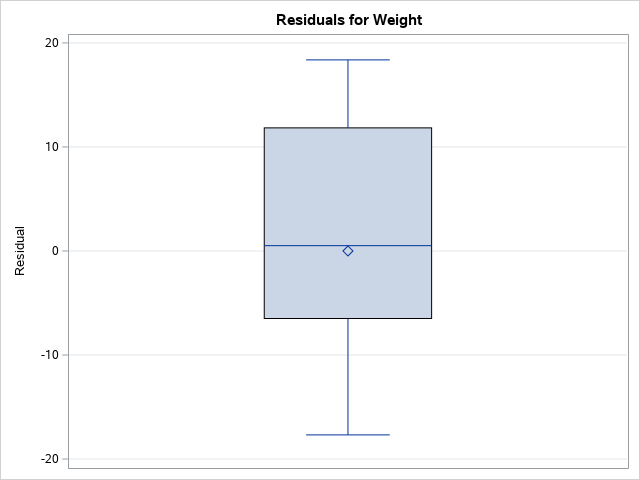
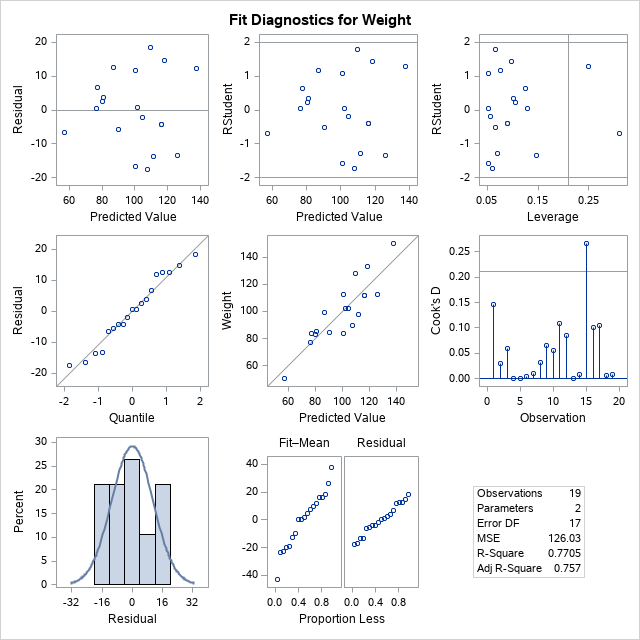
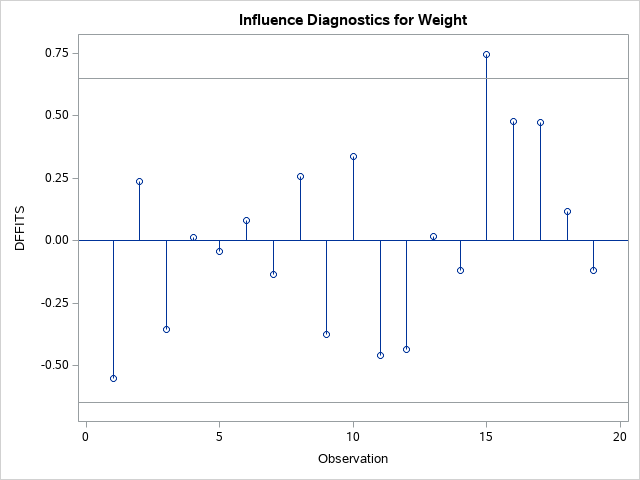
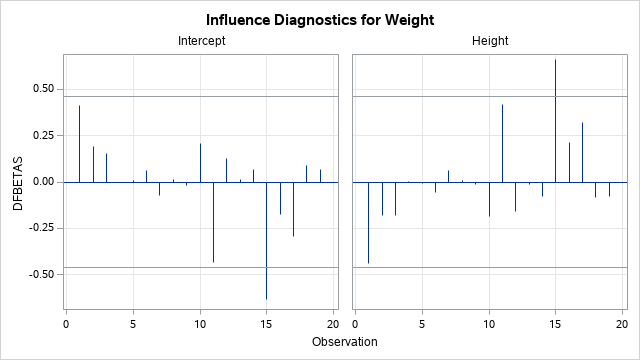
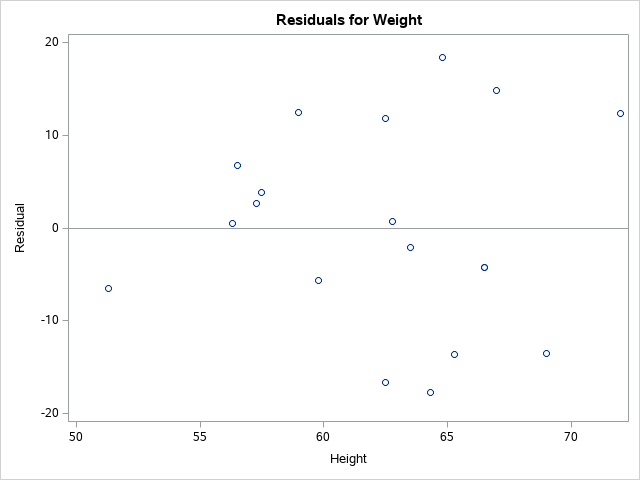
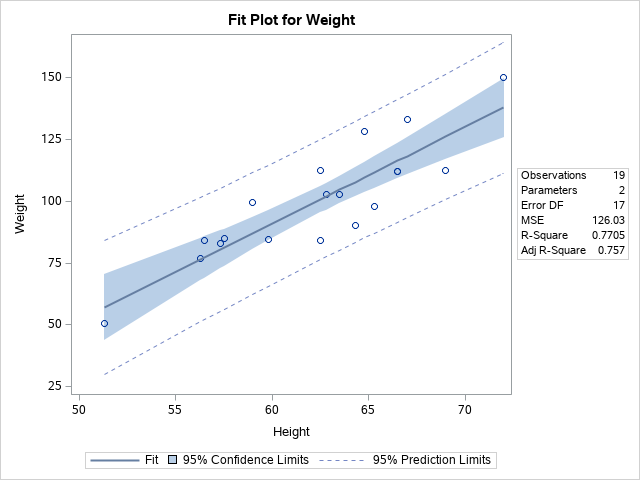

In [26]:
Title 'Model Selection';
PROC reg data = Class plots = all;
model weight =  age height / selection = stepwise;
Run;
quit;

In [28]:
PROC PRINT data = sashelp.Cars(obs= 5);
Run;

In [30]:
* Import data from sashelp;
DATA Cars;
SET SASHELP.cars;
RUN;

PROC PRINT data = Cars(obs= 5);
Run;


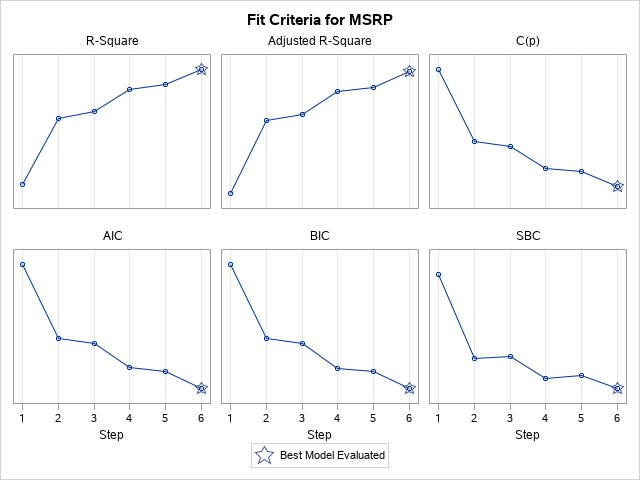
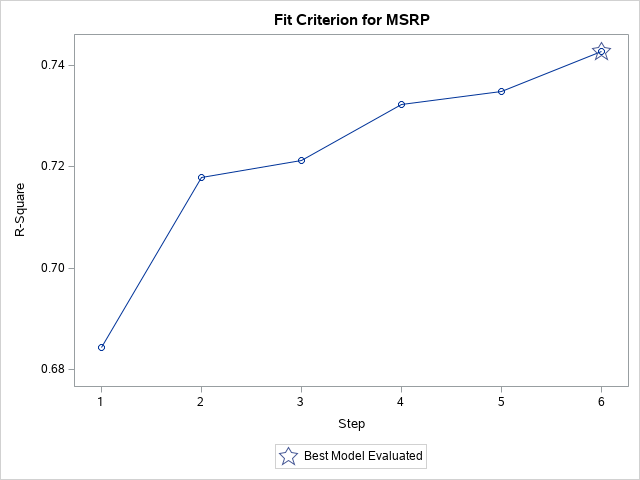
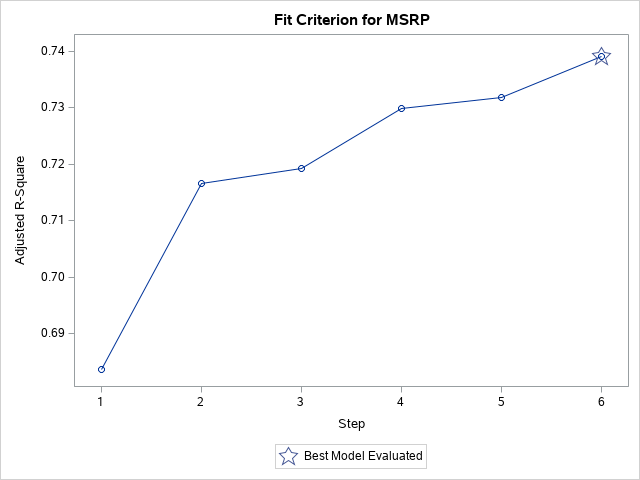
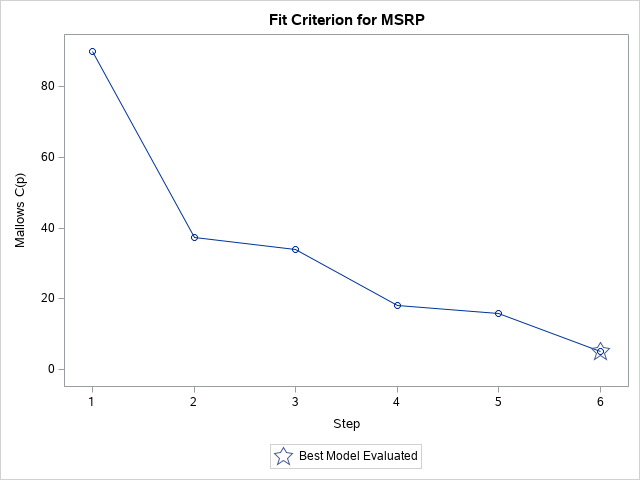
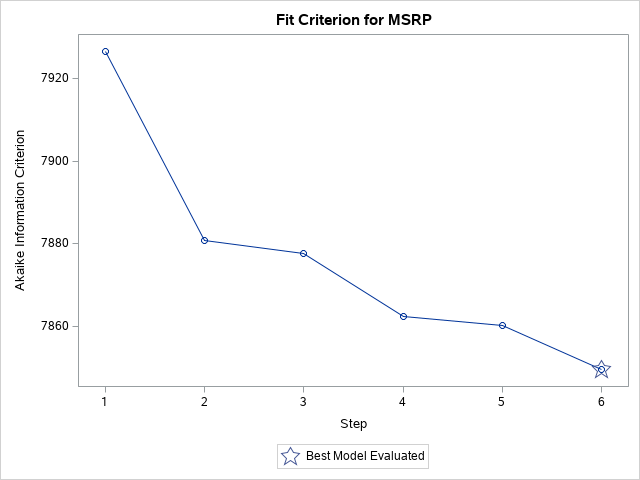
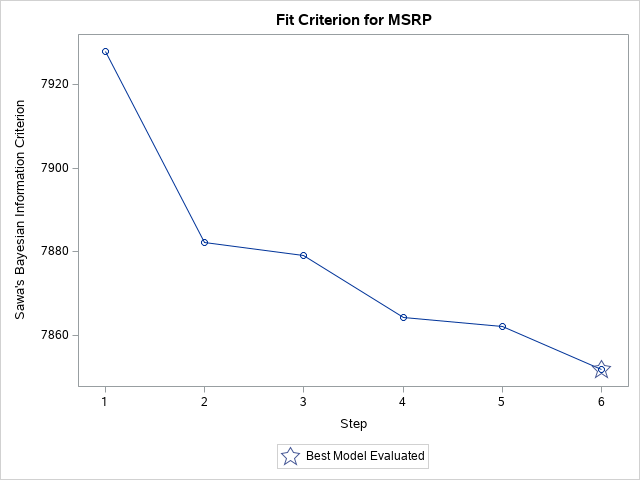
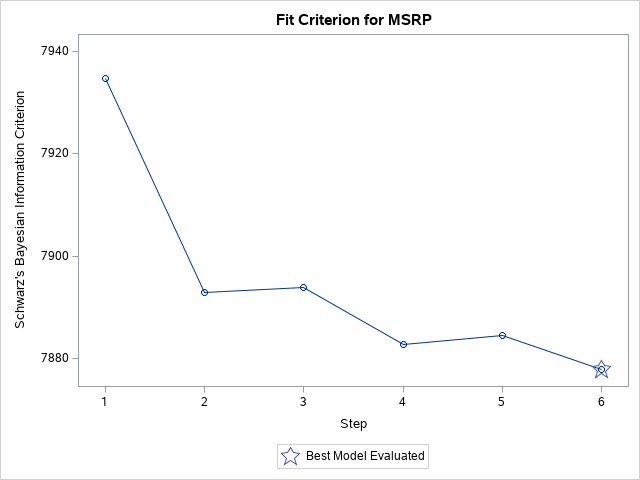
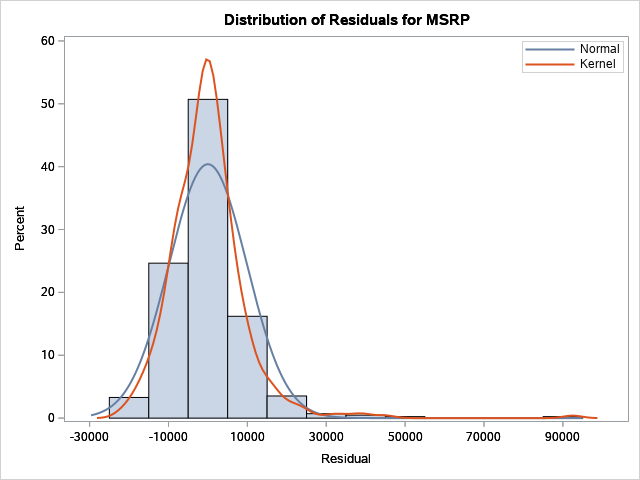
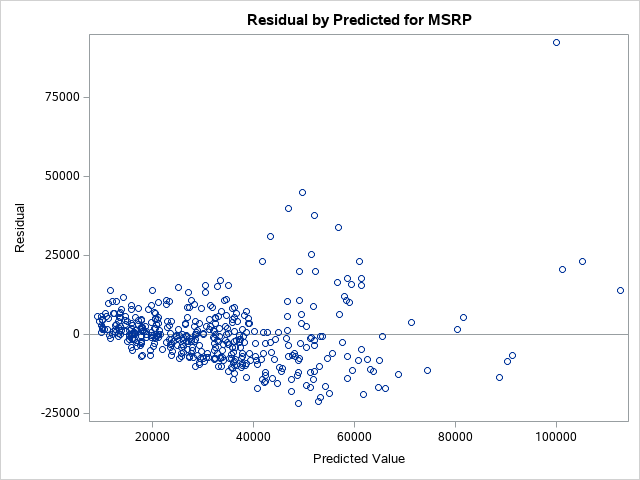
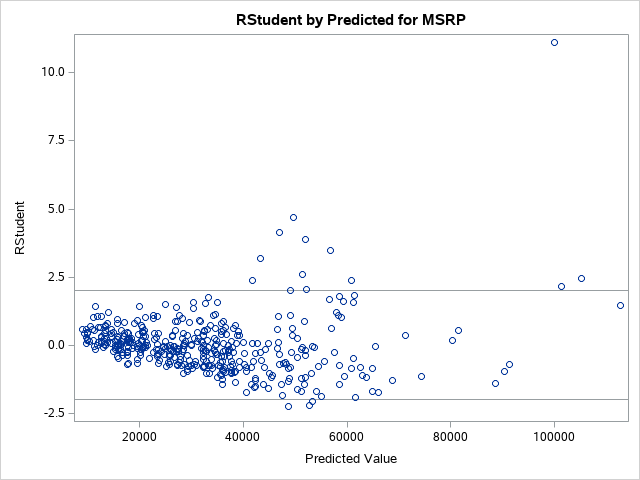
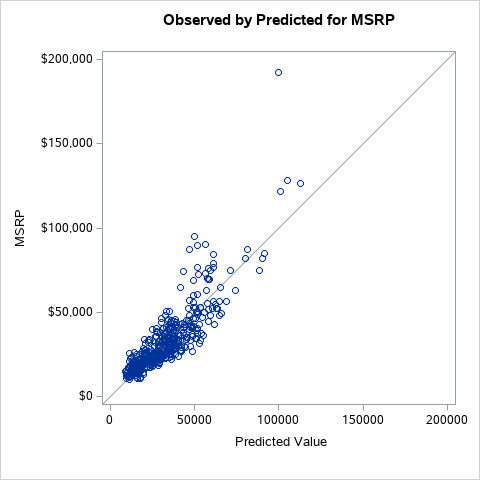
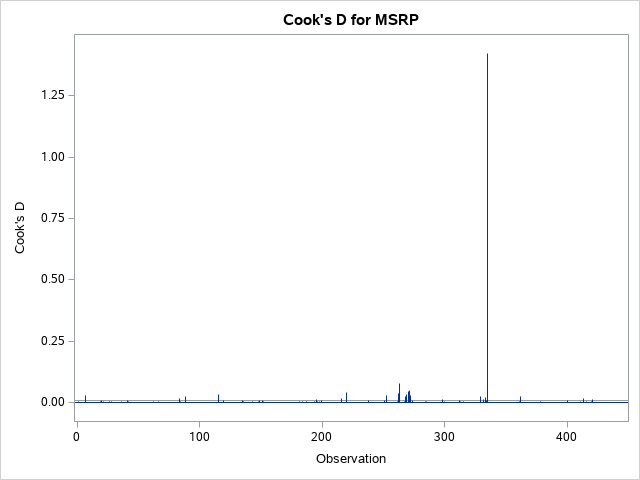
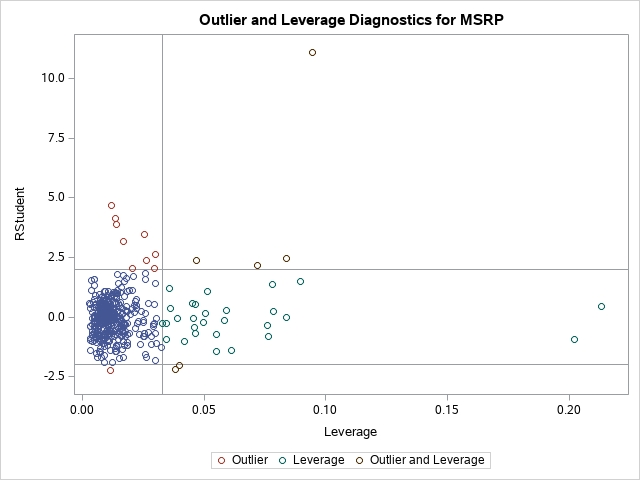
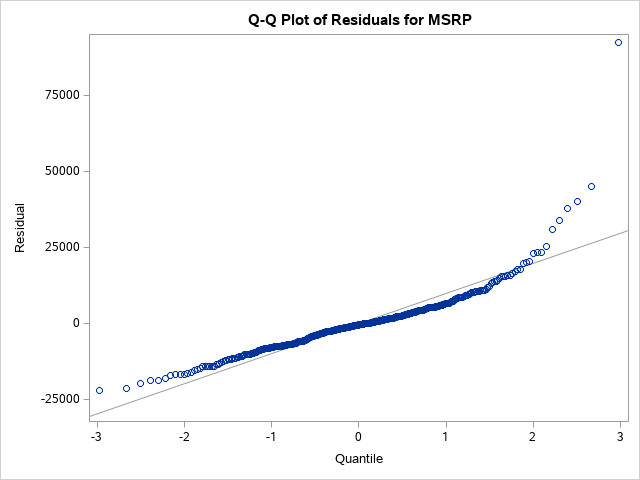
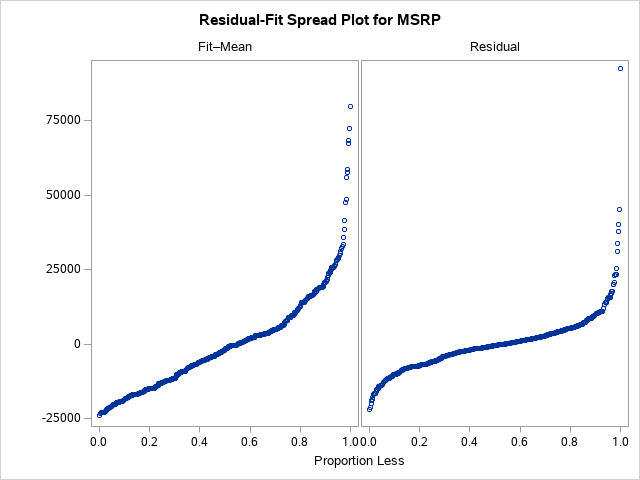
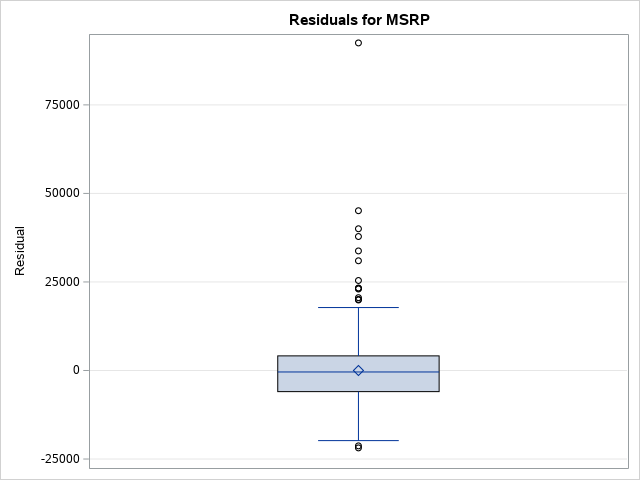
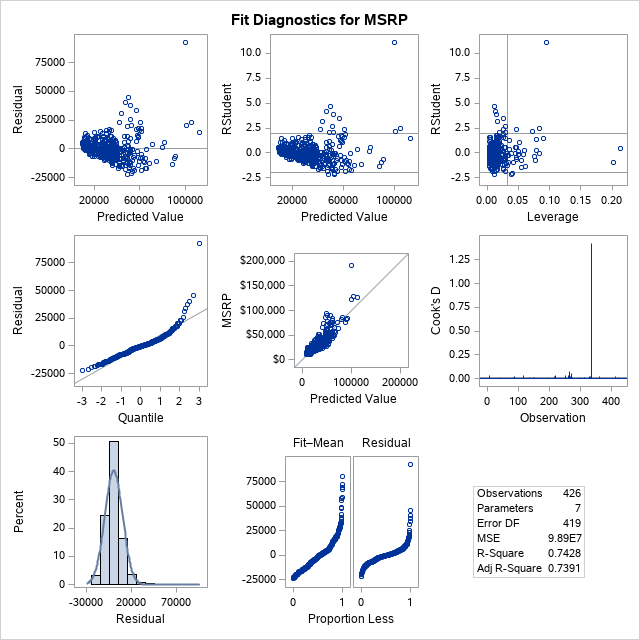
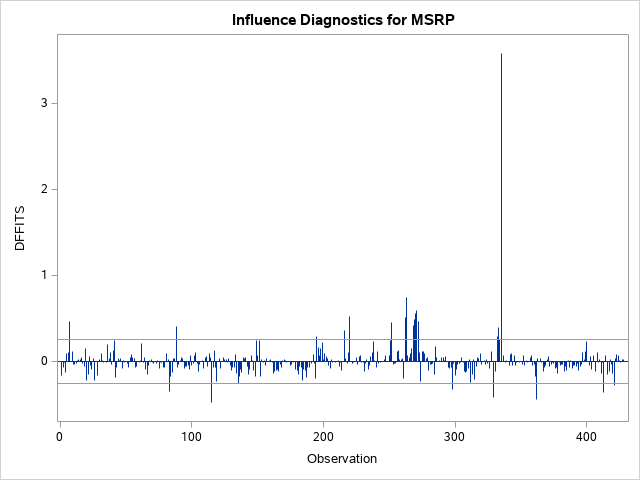
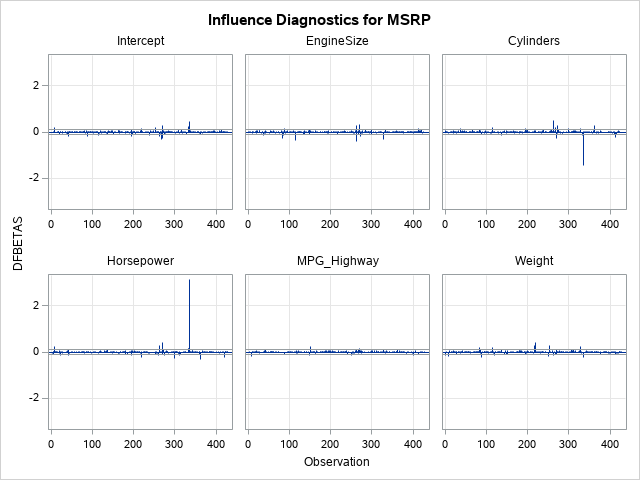
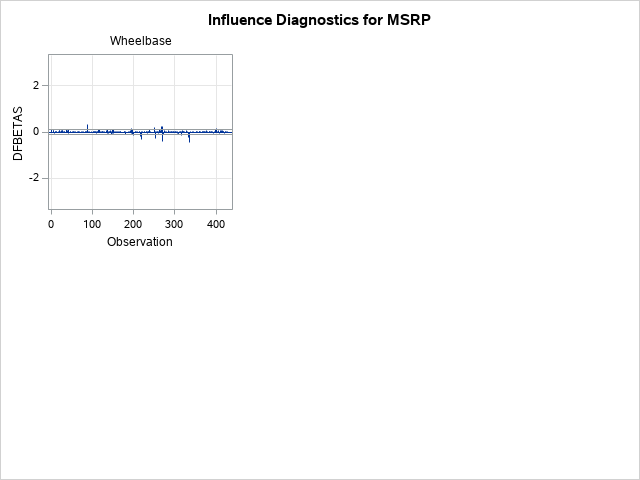
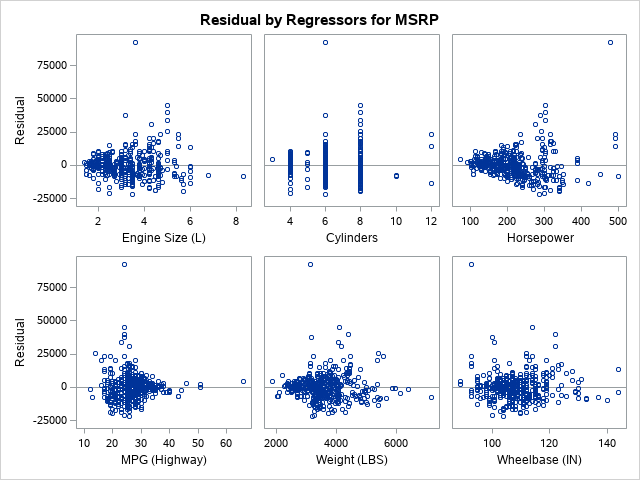

In [31]:
Title 'Model Selection';
PROC reg data = Cars plots = all;
model MSRP =  EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length / Selection = Stepwise Details= All ;
Run;
quit;



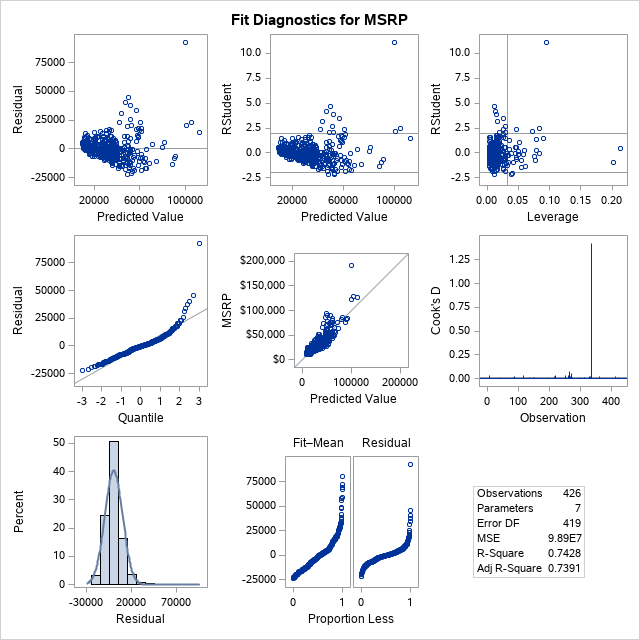
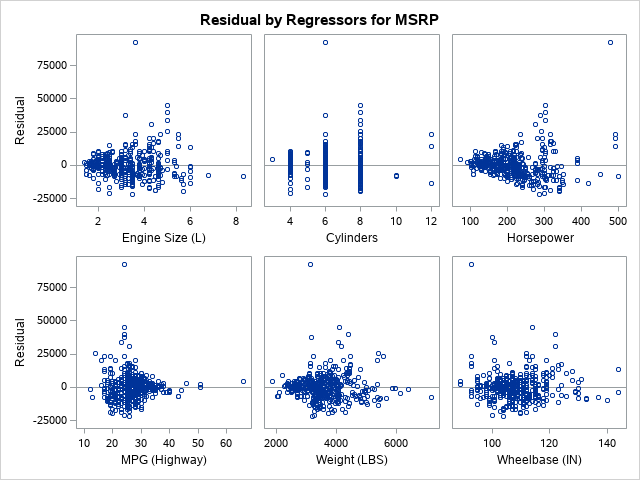

In [32]:
Title 'Best Model';
PROC reg data = Cars;
model MSRP =  EngineSize Cylinders Horsepower MPG_Highway Weight Wheelbase;
Run;
quit;